
# Machine Learning Project Report : Classification of wine (load_wine dataset)


สมาชิกในกลุ่ม

- 65340500001

- 65340500015

- 65340500053

- 65340500063

Guidelines
The goal of the case study is to classify 3 different type of wines from chemical and physical information.


# Wine quality dataset

##Target
  - class_0 : Target
  - class_1 : Target
  - class_2 : Target

##list of features
- Alcohol ระบุปริมาณแอลกอฮอลในไวน์ เป็นร้อยละโดยปริมาตร (% Alcohol by volume)
- Malic acid ระบุปริมาณกรดมาลิกในไวน์ มีผลกับความฝาดและรสเปรี้ยวของไวน์
- Ash คือปริมาณสารอนินทรีย์ที่ตกค้างหลังจากนำตัวอย่างไวน์มาเผา เป็นข้อมูลที่ใช้วิเคราะห์แร่ธาตุที่อยู่ในไวน์
- Alcalinity of ash คือความเป็นด่างของ Ash เมื่อนำมาผสมน้ำ สามารถวิเคราะห์ความฝาดของไวน์ไนด้
- Magnesium ปริมาณแมกนีเซี่ยมในไวน์ ซึ่งมีผลต่อรสชาติของไวน์
- Total Pheonols คือปริมาณสารประกอบกลุ่มหนึ่งที่เกิดจากองุ่นและะวิธีการหมัก มีผลกับสีและรสชาติของไวน์
- Flavanoids คือความเข้มข้นของ Pheonols ประเภท Flavanoids ในไวน์ มีผลกับสีและรสชาติของไวน์
- Nonflavanoid phenols คือความเข้มข้นของ Pheonols ประเภท Flavanoids ในไวน์ มีผลกับกลิ่นและรสชาติของไวน์
- Proanthocyanins คือความเข้มข้นของ Tannin ประเภทหนึ่งในไวน์ มีผลกับความฝาดและสีของไวน์
- Color intensity คือความเข้มสีของไวน์ สีที่อ่อนจะแสดงถึงรสชาติที่อ่อนนุ่มกว่า
- Hue คือลักษณะสีของไวน์ สามารถแสดงถึงรสชาติและอายุของไวน์
- OD280/OD315 of Diluted Wines คือความสามารถในการดูดซับแสงที่ความยาวคลื่น 280 และ 315 นาโนเมตร ของไวน์ที่ถูกเจือจางแล้ว สามารถแสดงถึงคุณภาพของไวน์และความเข้มข้นของสารกลุ่ม Phenolic
- Proline คือปริมาณ Proline ซี่งเป็นกรดอะมิโนประเภทหนึ่งที่พบในองุ่น เป็นแหล่งไนโตรเจนสำหรับยีสขณะหมักไวน์

## **0. Import necessary package**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

## **1. Construct dataframe and data description**

### Dataframe construction

In [ ]:
# (this) load_wine dataset from sklearn's repo
# https://www.geeksforgeeks.org/wine-dataset/

from sklearn.datasets import load_wine
datasetOBJ_from_SKlearn = load_wine()


In [ ]:
# Print and list value that is fetched from sklearn's repo
'''
There are 6 value inside. Assuming from key's name and sklearn's guide
'data' contains feature's data
'target' contains target's data
'frame'
'target_names' contain target's name
'feature_names' contain feature's name for each column
'DESCR' contain dataset description
'''


# datasetOBdatasetOBJ_from_SKlearn
datasetOBJ_from_SKlearn.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# Construct 'feature_dataframe' from data and feature_names
# Then display property of dataframe

feature_dataframe = pd.DataFrame(datasetOBJ_from_SKlearn.data, columns=datasetOBJ_from_SKlearn.feature_names)
print("Dataframe's shape: ",feature_dataframe.shape)
feature_dataframe.head()

Dataframe's shape:  (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Save dataframe as csv in case of loosing access to SKLearn's repo

feature_dataframe.to_csv("./feature.csv")

In [ ]:
# Construct 'target_dataframe' from target and target_names
# Then display property of dataframe

target_dataframe = pd.DataFrame(datasetOBJ_from_SKlearn.target)
print("Target's shape: ",target_dataframe.shape)
print("Target's unique value: ", pd.unique(target_dataframe[0]))
target_dataframe.head()

Target's shape:  (178, 1)
Target's unique value:  [0 1 2]


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Save dataframe as csv in case of loosing access to SKLearn's repo

target_dataframe.to_csv("./target.csv")

### Data Description

In [ ]:
# Print description of the dataframe
print(datasetOBJ_from_SKlearn.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## **2. Defining Problem Statement**

### Problem Statement  
The goal is to learn from the wine dataset and predict the class of a wine sample based on its chemical properties.  

### Task  
Create a predictive model that can determine the type of wine (Class 0, Class 1, or Class 2) based on features such as alcohol content, acidity, phenols, and other chemical measurements.  

- **Target Variable**: *wine class* (Class 0, 1, 2)  
- **Predictors**: Chemical properties such as alcohol, malic acid, ash, flavonoids, proanthocyanins, color intensity, and others.  
- **Samples**: 178 wine samples from different cultivars, each with 13 chemical properties.  

### Determining the Type of Machine Learning  
This is a supervised ML classification problem, as the target variable (wine class) is categorical.  

### Basic Assumptions:  
1. **Chemical Composition**: Properties like alcohol, flavonoids, and phenols are likely strong predictors of wine class as they are direct indicators of wine quality and type.  
2. **Feature Relationships**: Interactions between variables (e.g., alcohol content and acidity) may help improve model performance. (Haven't been implemented in this model due to lack of sample since we have low amount of sample and won't be able to tell the different.)
3. **Potentially Non-Influential Features**: Some features, such as hue, might have less impact depending on the distribution across classes.  

The aim is to build a classification model with high accuracy to classify wines effectively based on their chemical characteristics.

## **3. Basic Data Exploration**


In this stage, We explore basic information like column names, target distribution between class as well as doing basic fixes.

the data was already clean and well-structured from the `sklearn` library,
but basic check is still nessessory. The initial data exploration involved
- checking for duplicate and missing values,
- removing unnecessary ID columns.  

Results :
- No duplicates, missing values were found in the dataset.
- irrelevant ID columns 'Unnammed' has been removed.


In [ ]:
# Load value from saved csv file to dataframe.

feature_dataframe = pd.read_csv('./feature.csv')
target_dataframe = pd.read_csv('./target.csv')

In [ ]:
# Show what's in dataframe

feature_dataframe.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Show what's in dataframe

target_dataframe.head()

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


Class Distribution: class_0 (59), class_1 (71), class_2 (48)

In [ ]:
# Check for duplicate data in dataframe

print("Feature dataframe: ", feature_dataframe.duplicated().any())
print("Target dataframe: ", target_dataframe.duplicated().any())

# There are no duplicate data

Feature dataframe:  False
Target dataframe:  False


In [ ]:
# From dataframe's sample, There's redundant 'id' column.
# Decide to drop specified column

feature_dataframe = feature_dataframe.drop(columns=['Unnamed: 0'])
target_dataframe = target_dataframe.drop(columns=['Unnamed: 0'])

In [ ]:
# Check for missing values

print(feature_dataframe.isna().sum())
print("*" * 30)
print(target_dataframe.isna().sum())

# There are no missing value. Phewwww...

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
******************************
0    0
dtype: int64


There was no missing values, Duplicated columns

## **4. Looking at data distribution**

### 4.1 Target Visualization

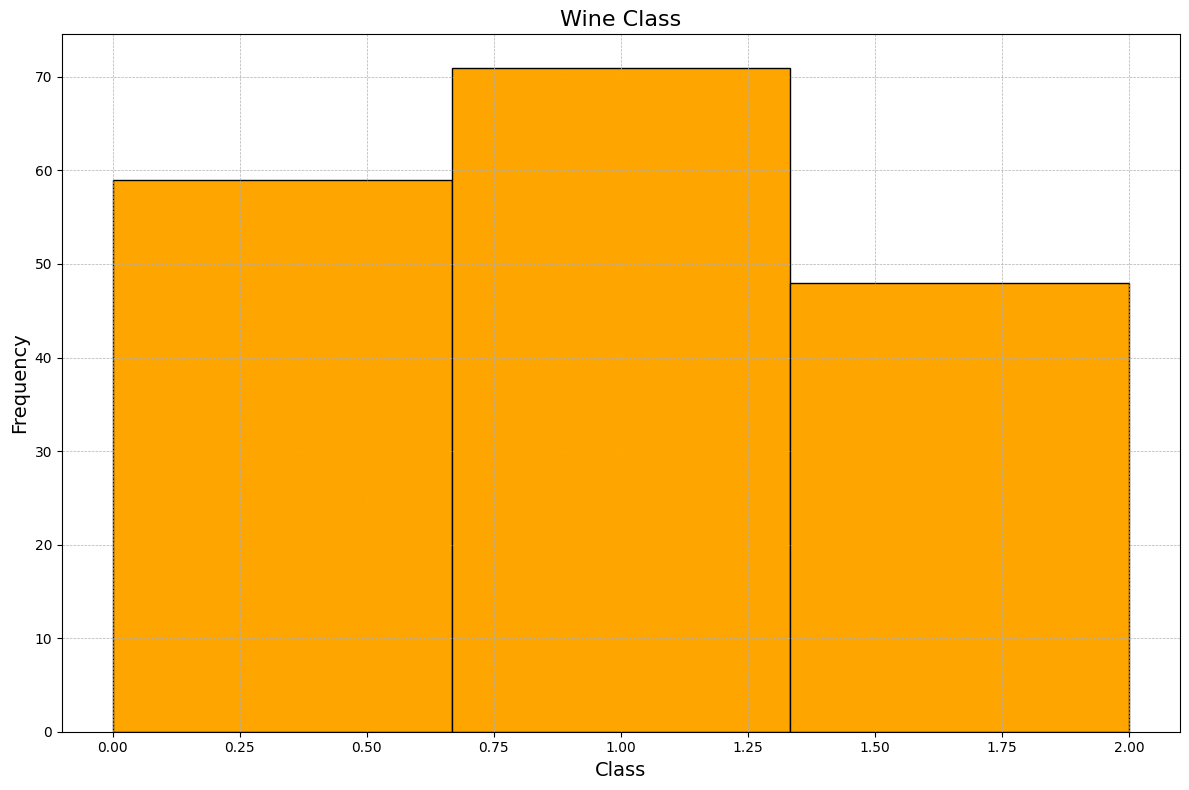

In [ ]:
# Set a larger figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot histogram for the target variable (Wine class)
plt.subplot(1, 1, 1)  # A single plot; adjust grid if needed
plt.hist(target_dataframe, bins=3, color='orange', edgecolor='black')
plt.title('Wine Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


- Class Distribution: class_0 (59), class_1 (71), class_2 (48)
- The target is slightly imbalanced between classes (may require undersampling to 48)

### 4.2 Feature Visualization

In this stage, We through roughly explore every feature's distribution to spot Existing Outlier and Skewness which may be an issue in our model training espitially sensitive models.

We are using
- Boxplot to spot outlier
- Histogral + KDE Plot to spot skewness and statistical distribution

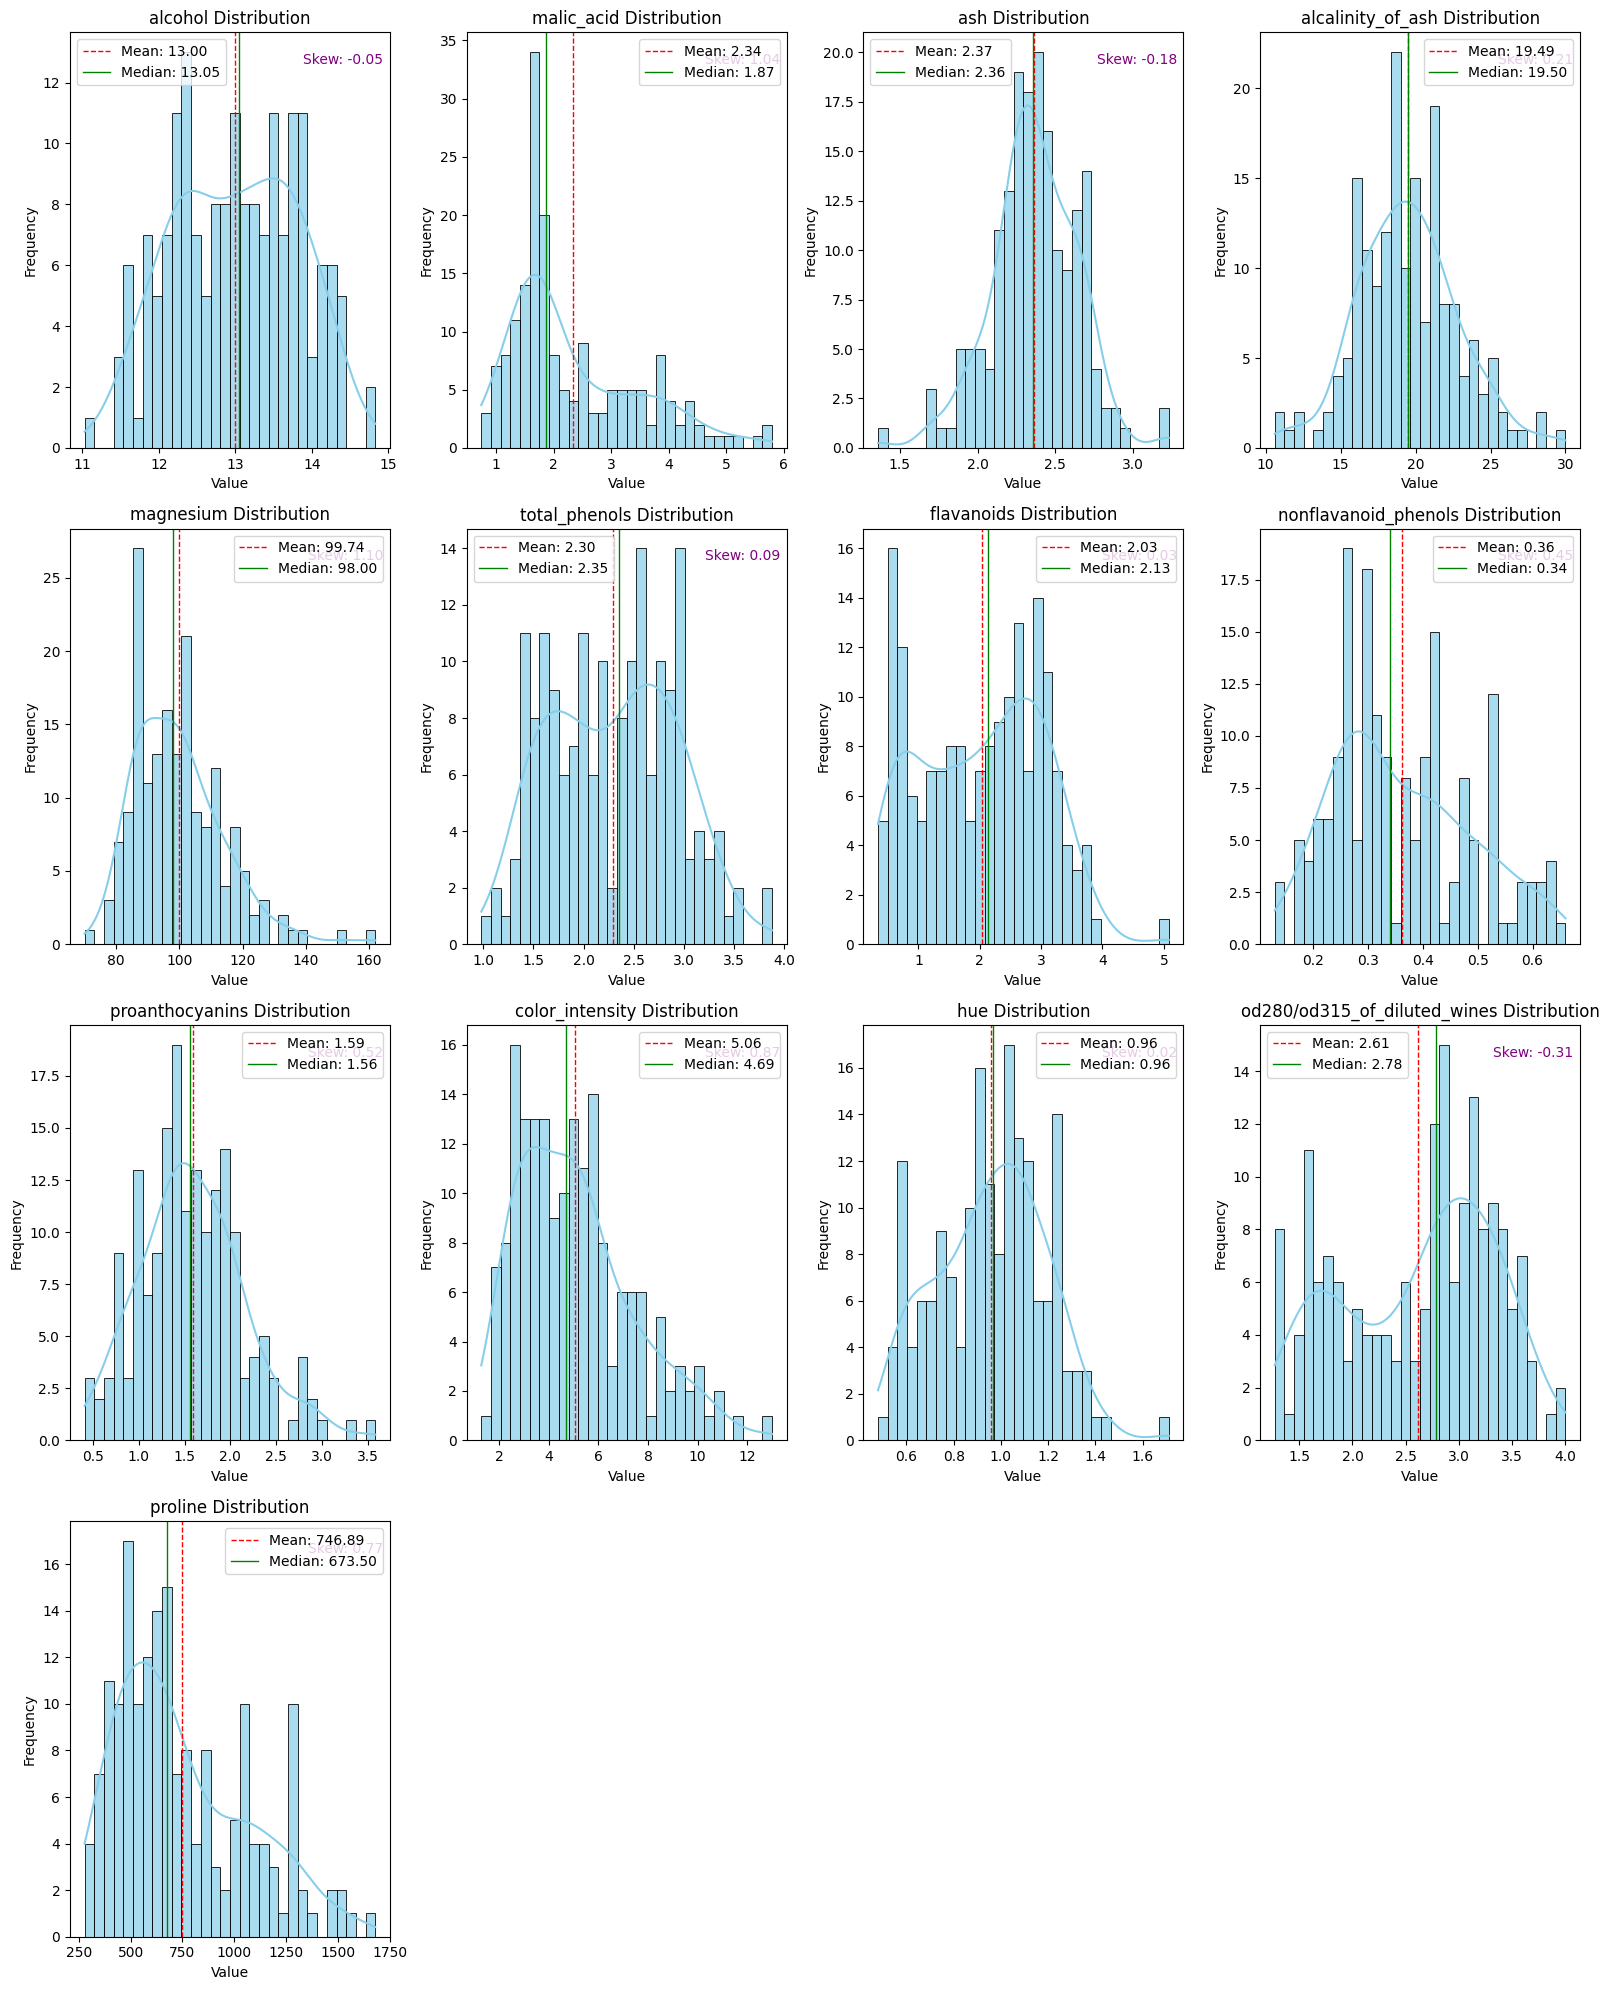

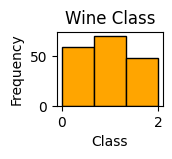

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot detailed histograms for each feature
plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot histogram with KDE
    sns.histplot(feature_dataframe[col], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()

    # Plot mean and median lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1, label=f'Median: {median_val:.2f}')

    # Add text for skewness
    plt.text(0.98, 0.95, f'Skew: {skewness:.2f}', transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=10, color='purple')

    # Titles and labels
    plt.title(f'{col} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


**More detailed KDE and Boxplot**

alcohol is skewed by -0.051482331077134784
malic_acid is skewed by 1.0396511925814442
ash is skewed by -0.17669931645735712
alcalinity_of_ash is skewed by 0.21304688642645586
magnesium is skewed by 1.098191054755161
total_phenols is skewed by 0.08663858640245253
flavanoids is skewed by 0.02534355338149103
nonflavanoid_phenols is skewed by 0.4501513355621236
proanthocyanins is skewed by 0.5171371722998975
color_intensity is skewed by 0.8685847909572548
hue is skewed by 0.021091272199709302
od280/od315_of_diluted_wines is skewed by -0.30728549895848106
proline is skewed by 0.7678217813897322


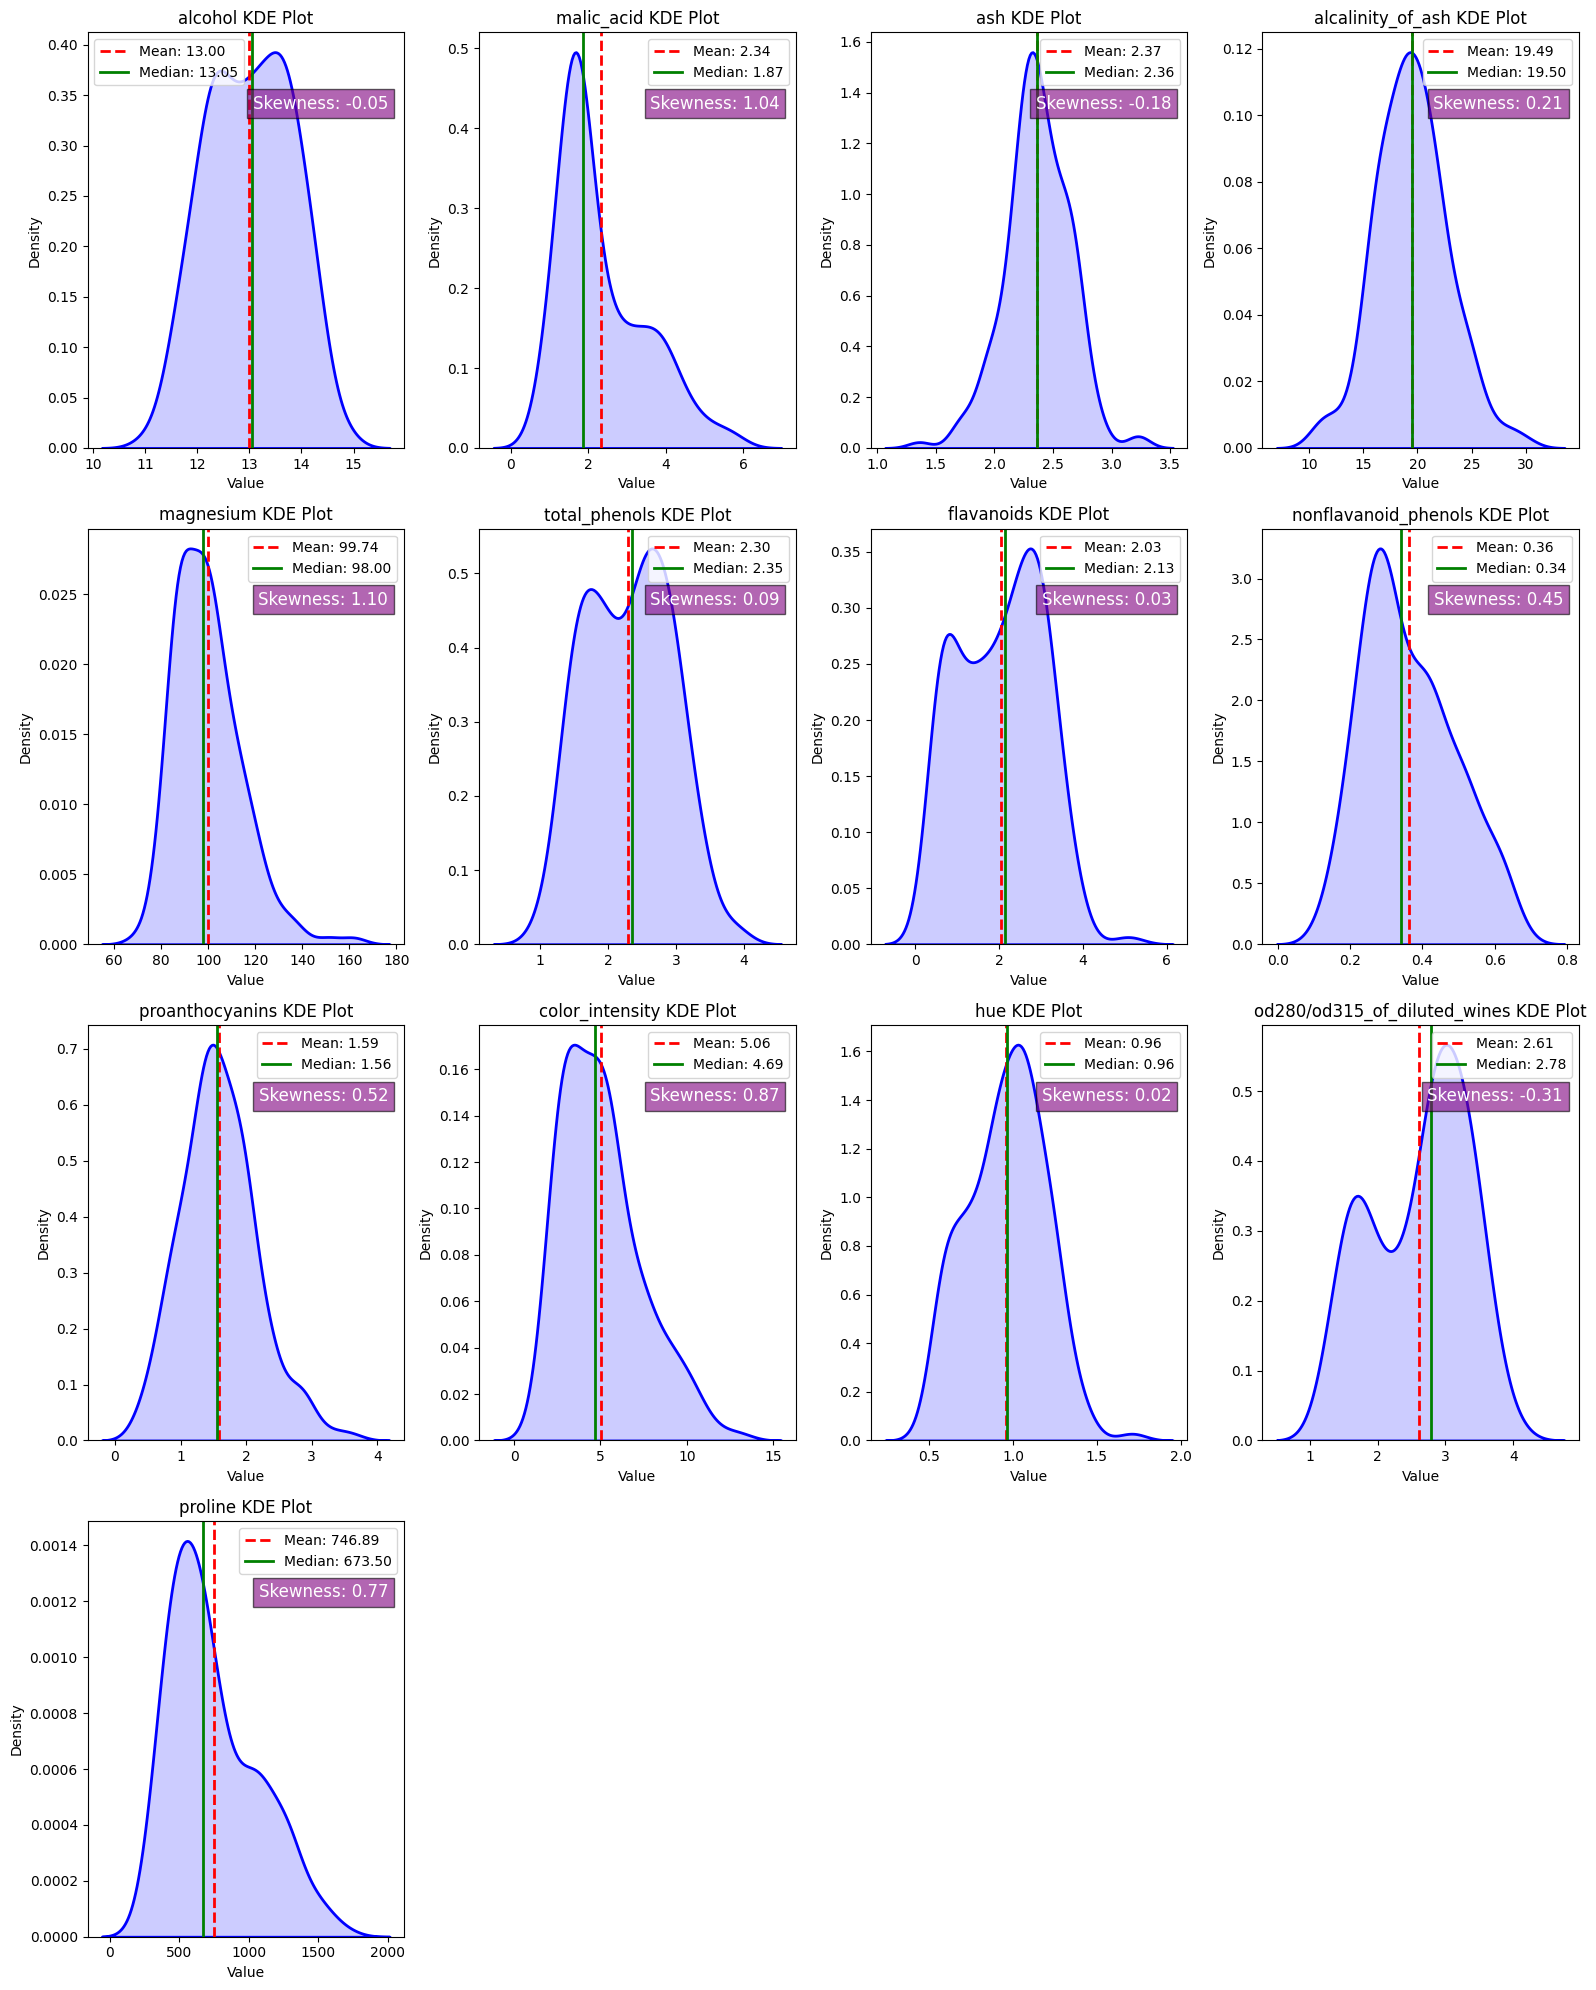

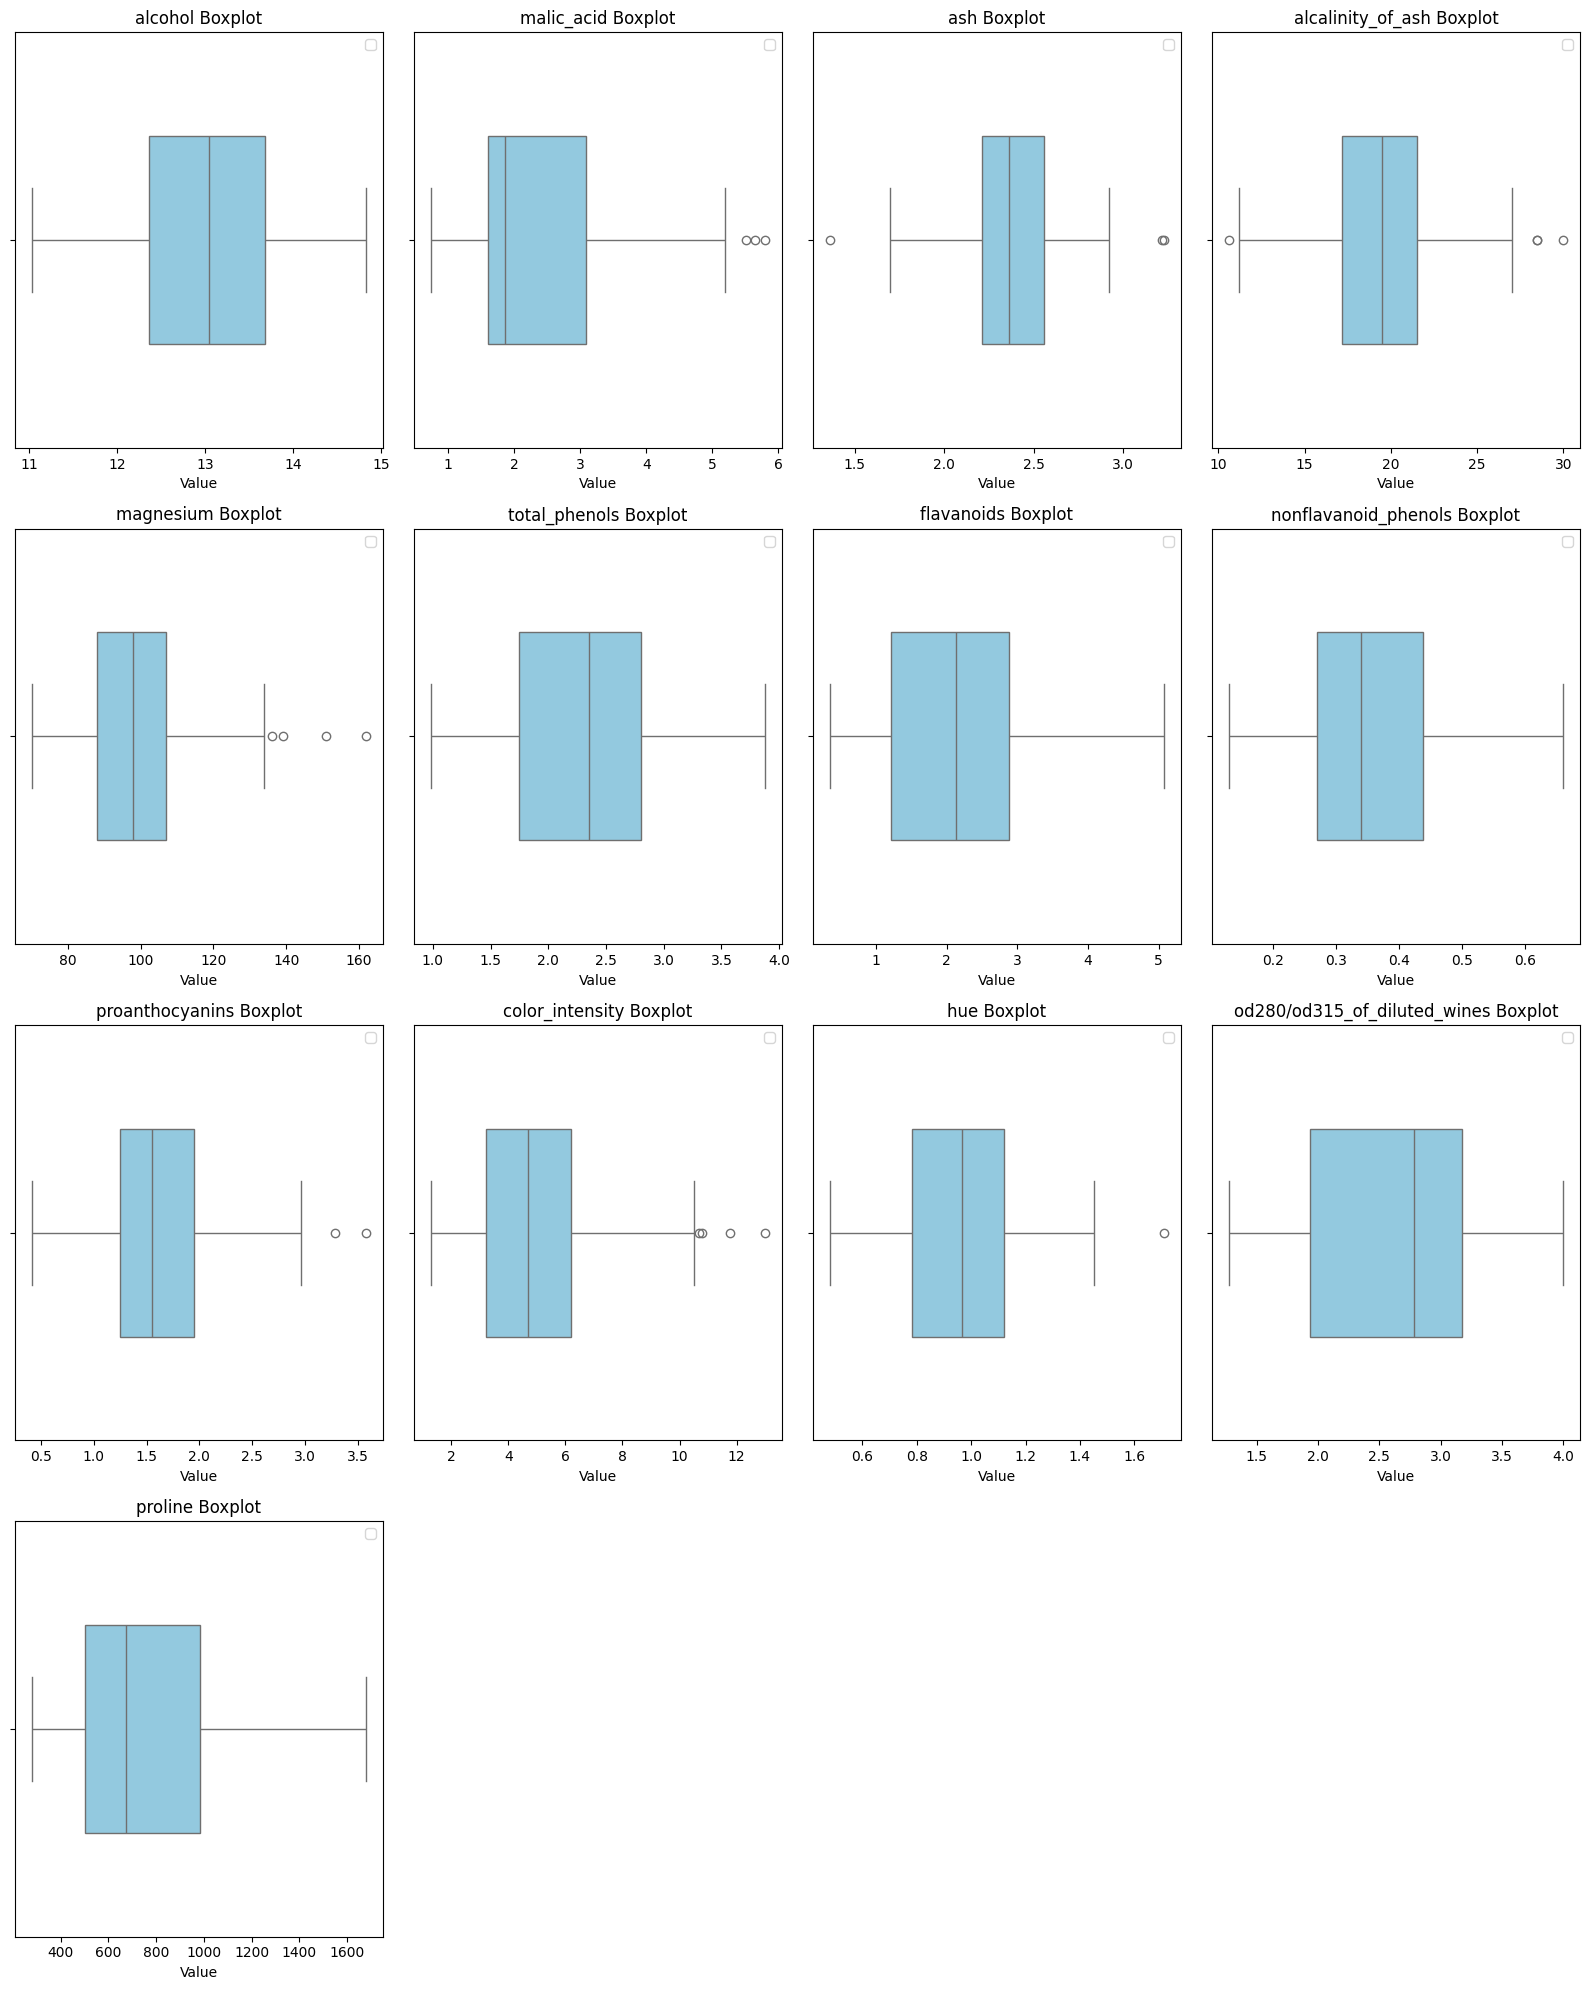

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot KDE
    sns.kdeplot(feature_dataframe[col], color='blue', linewidth=2, fill=True, alpha=0.2)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()
    print(f'{col} is skewed by {skewness}')
    # Plot mean and median lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add skewness text with a background for visibility
    plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} KDE Plot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot the boxplot
    sns.boxplot(data=feature_dataframe, x=col, color='skyblue', width=0.5)

    # Calculate statistics
    # mean_val = feature_dataframe[col].mean()
    # median_val = feature_dataframe[col].median()
    # skewness = feature_dataframe[col].skew()

    # # Plot mean and median as vertical lines
    # plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    # plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # # Add skewness text with background box
    # plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
    #          ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} Boxplot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


####Basic Data Visualization and Cleaning Overview
- Dataset Overview
Feature DataFrame:
Contains various numerical features of wine with no missing values.
- Target DataFrame:
Represents the wine class, which is the target variable.


Distribution of wine classes contain 3 distinct categories.
- Missing Value Analysis and Dupicate Check
  - Feature DataFrame: No missing values detected & duplicate found.
  - Target DataFrame: No missing values detected & duplicate found.


- Data Distribution Analysis
Target Variable Distribution (Wine Class):
  - Histogram shows the frequency of each wine class
  - The classes seem to be imbalancedThe classes seem to be imbalanced

  - Feature Variable:
    - Histograms and KDE Plots
      - Skewness Treatments
    - Boxplots
      - Outliers Treatments

 - Outliers Detection
    - view from visual boxplot
  

#### Exploration result
As a result most data show visible outliers and skewness and we've marked down result.

for Outlier, we've listed out boundary for features that require clipping.



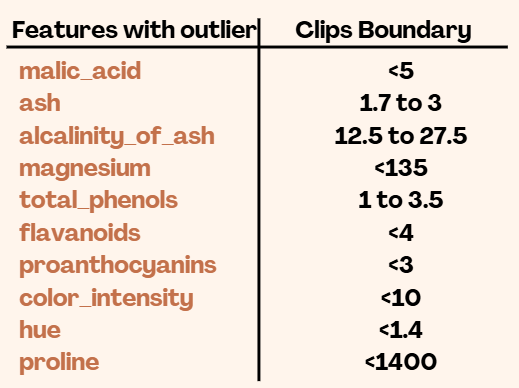

For Skewness, We've marked down calculated data from KDE for more statistical result

there are some that require treatment as marked red (for feature with more than 0.3 left/right skew)

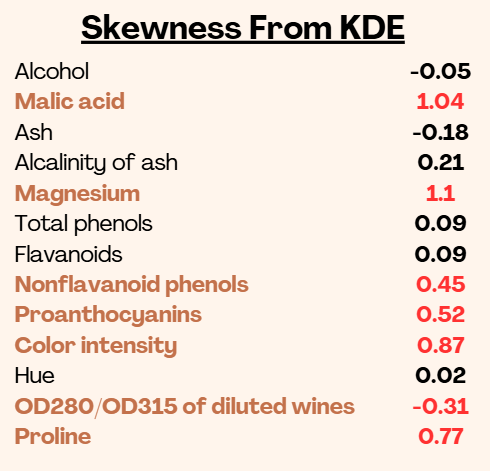

##**5. Outlier Treatment**
(with the information from 4.2)
Features and Clipping Ranges:
- malic_acid	Maximum: 5
- ash	Range: 1.75 - 3
- alcalinity_of_ash	Range: 12.5 - 27.5
- magnesium	Maximum: 135
- total_phenols	Range: 1 - 3.5
- flavanoids	Maximum: 4
- proanthocyanins	Maximum: 3
- color_intensity	Maximum: 10
- hue	Maximum: 1.4
- proline	Maximum: 1400

In [ ]:
selected_feature = 'malic_acid'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=5)
feature_dataframe[selected_feature].max()

5.0

In [ ]:
selected_feature = 'ash'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=1.75, a_max=3)
print(feature_dataframe[selected_feature].min())
print(feature_dataframe[selected_feature].max())

1.75
3.0


In [ ]:
selected_feature = 'alcalinity_of_ash'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=12.5, a_max=27.5)
print(feature_dataframe[selected_feature].min())
print(feature_dataframe[selected_feature].max())

12.5
27.5


In [ ]:
selected_feature = 'magnesium'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=135)
feature_dataframe[selected_feature].max()

135.0

In [ ]:
selected_feature = 'total_phenols'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=1, a_max=3.5)
print(feature_dataframe[selected_feature].min())
print(feature_dataframe[selected_feature].max())

1.0
3.5


In [ ]:
selected_feature = 'flavanoids'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=4)
feature_dataframe[selected_feature].max()

4.0

In [ ]:
selected_feature = 'proanthocyanins'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=3)
feature_dataframe[selected_feature].max()

3.0

In [ ]:
selected_feature = 'color_intensity'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=10)
feature_dataframe[selected_feature].max()

10.0

In [ ]:
selected_feature = 'hue'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=1.4)
feature_dataframe[selected_feature].max()

1.4

In [ ]:
selected_feature = 'proline'
feature_dataframe[selected_feature] = np.clip(feature_dataframe[selected_feature],a_min=None, a_max=1400)
feature_dataframe[selected_feature].max()

1400.0

### Plotting againt to see changes

alcohol is skewed by -0.051482331077134784
malic_acid is skewed by 0.9112811330066067
ash is skewed by -0.15000380787439294
alcalinity_of_ash is skewed by 0.2025783650247232
magnesium is skewed by 0.6596089908057204
total_phenols is skewed by 0.007708005218396202
flavanoids is skewed by -0.07933164444850026
nonflavanoid_phenols is skewed by 0.4501513355621236
proanthocyanins is skewed by 0.35081104824530923
color_intensity is skewed by 0.6528383096943028
hue is skewed by -0.14616432405215163
od280/od315_of_diluted_wines is skewed by -0.30728549895848106
proline is skewed by 0.6325095814063586


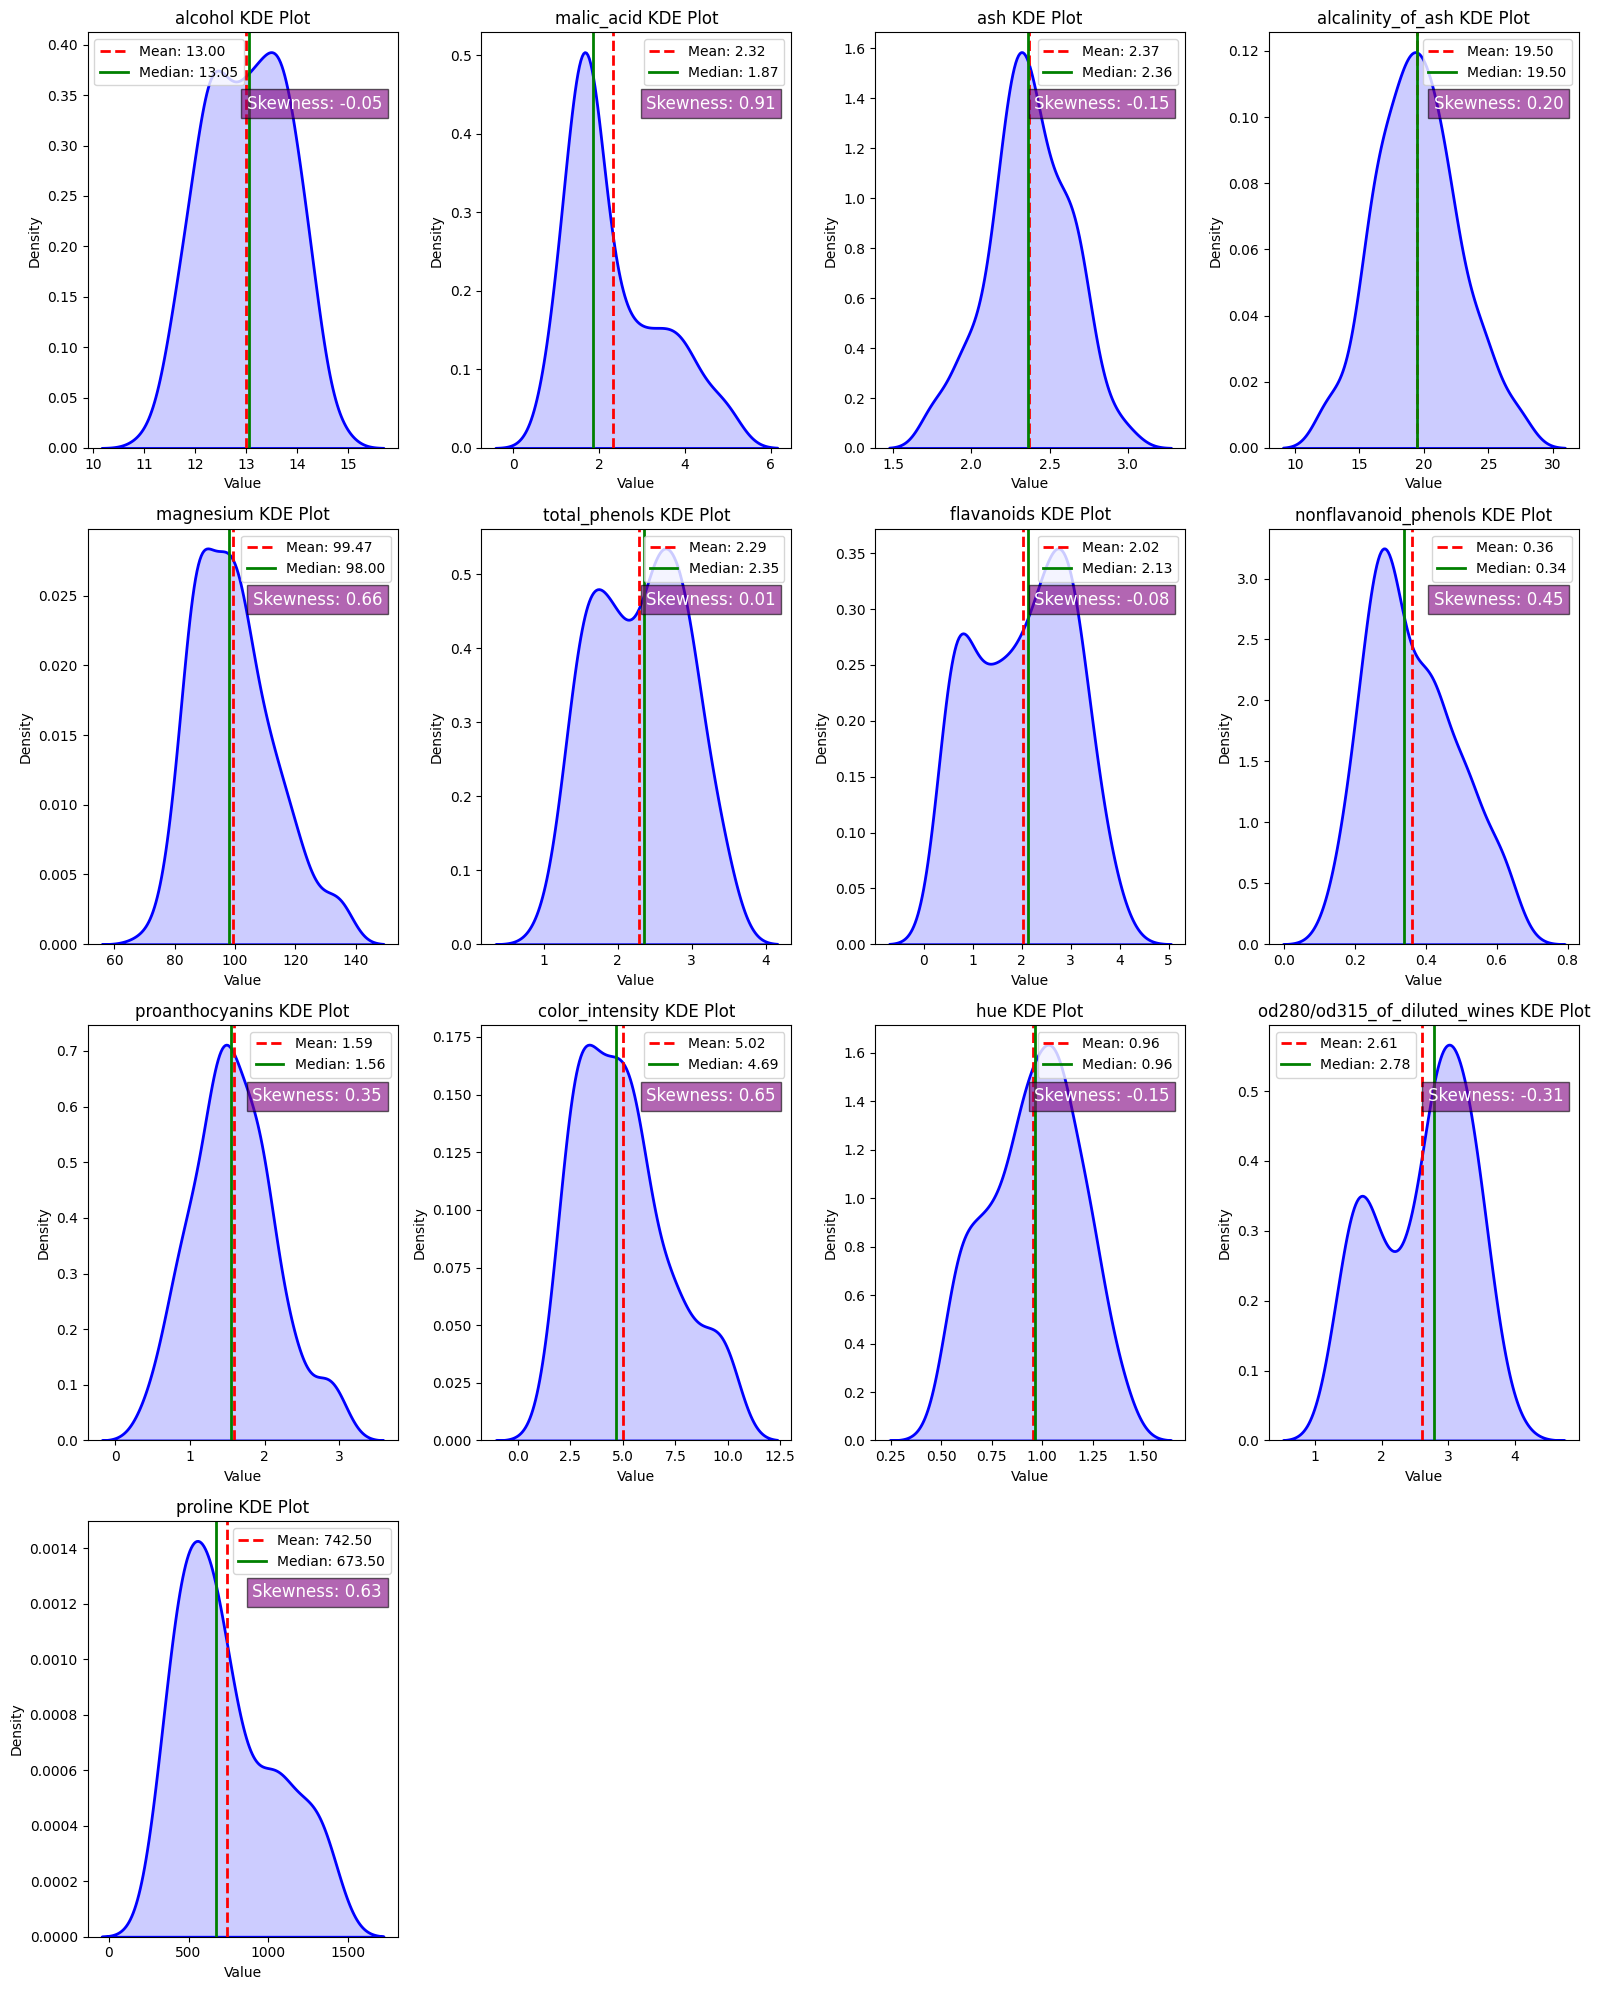

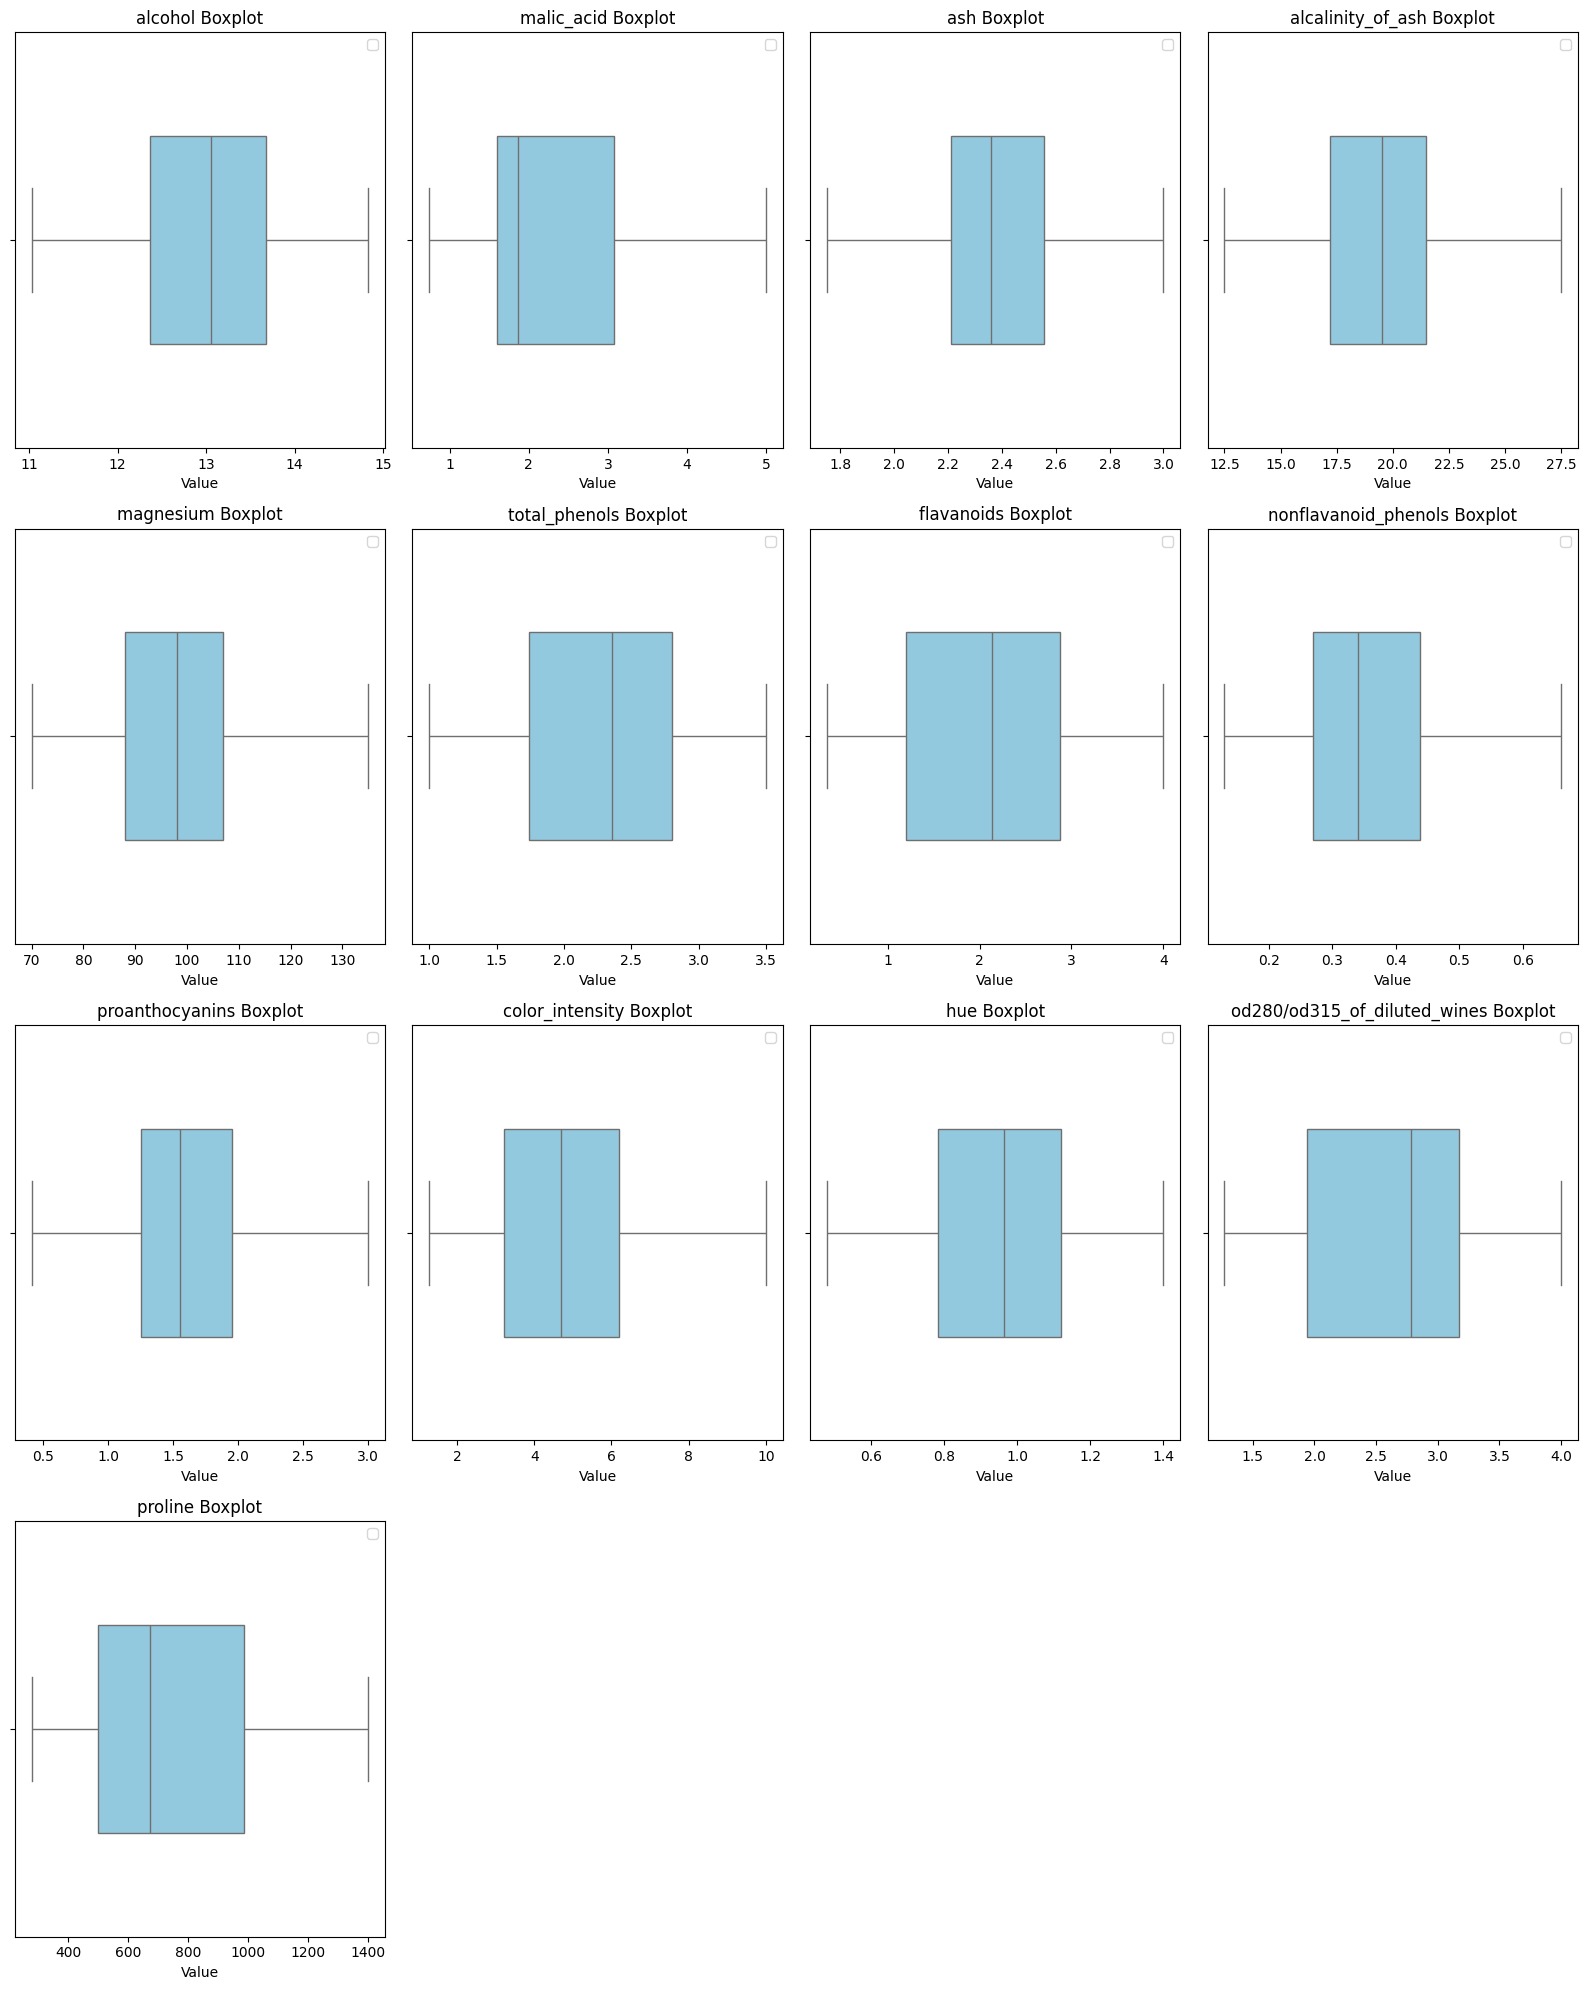

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot KDE
    sns.kdeplot(feature_dataframe[col], color='blue', linewidth=2, fill=True, alpha=0.2)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()
    print(f'{col} is skewed by {skewness}')
    # Plot mean and median lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add skewness text with a background for visibility
    plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} KDE Plot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot the boxplot
    sns.boxplot(data=feature_dataframe, x=col, color='skyblue', width=0.5)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()

    # # Plot mean and median as vertical lines
    # plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    # plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # # Add skewness text with background box
    # plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
    #          ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} Boxplot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()




After Clipping:
- malic_acid: Heavily skewed, indicating the need for potential transformations.
- magnesium and color_intensity: Moderately skewed, less extreme than pre-clipping.
- proline: Still heavily skewed despite clipping, highlighting the need for scaling.
- nonflavanoid_phenols: Lightly skewed and likely does not need further correction.

As a result:
- All outlier are cleaned
- There's improvement in skewness (most value aside from hue which increased the skewness)
- This show that outlier in this data did affect skewness to a certain extend


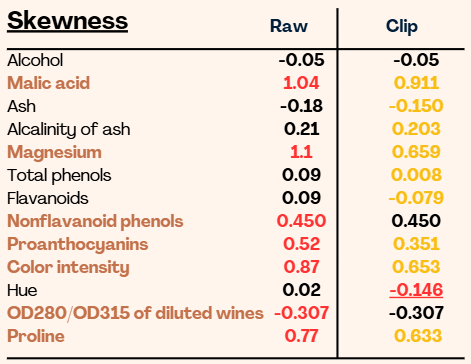

## **6. Initial Feature Selection (with visual correlation and anova**

** Note on Anova : It is only here for comparison after transformation, it will not be taken seriously until skewness is fixed**

In [ ]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Perform ANOVA F-test
f_scores, p_values = f_classif(feature_dataframe, target_dataframe['0'])

# Organize results into a DataFrame
anova_results = pd.DataFrame({"Feature": feature_dataframe.columns, "F-Score": f_scores, "p-value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

print(anova_results)


                         Feature     F-Score       p-value
6                     flavanoids  262.876700  1.900523e-53
12                       proline  223.679912  6.126236e-49
11  od280/od315_of_diluted_wines  189.972321  1.393105e-44
0                        alcohol  135.077624  3.319504e-36
9                color_intensity  130.484030  2.058474e-35
10                           hue  109.024422  1.785494e-31
5                  total_phenols   95.359625  9.781266e-29
1                     malic_acid   38.469767  1.420369e-14
3              alcalinity_of_ash   38.384912  1.506633e-14
8                proanthocyanins   32.226997  1.213101e-12
7           nonflavanoid_phenols   27.575417  3.888041e-11
4                      magnesium   16.416759  2.922235e-07
2                            ash   14.161322  1.993317e-06


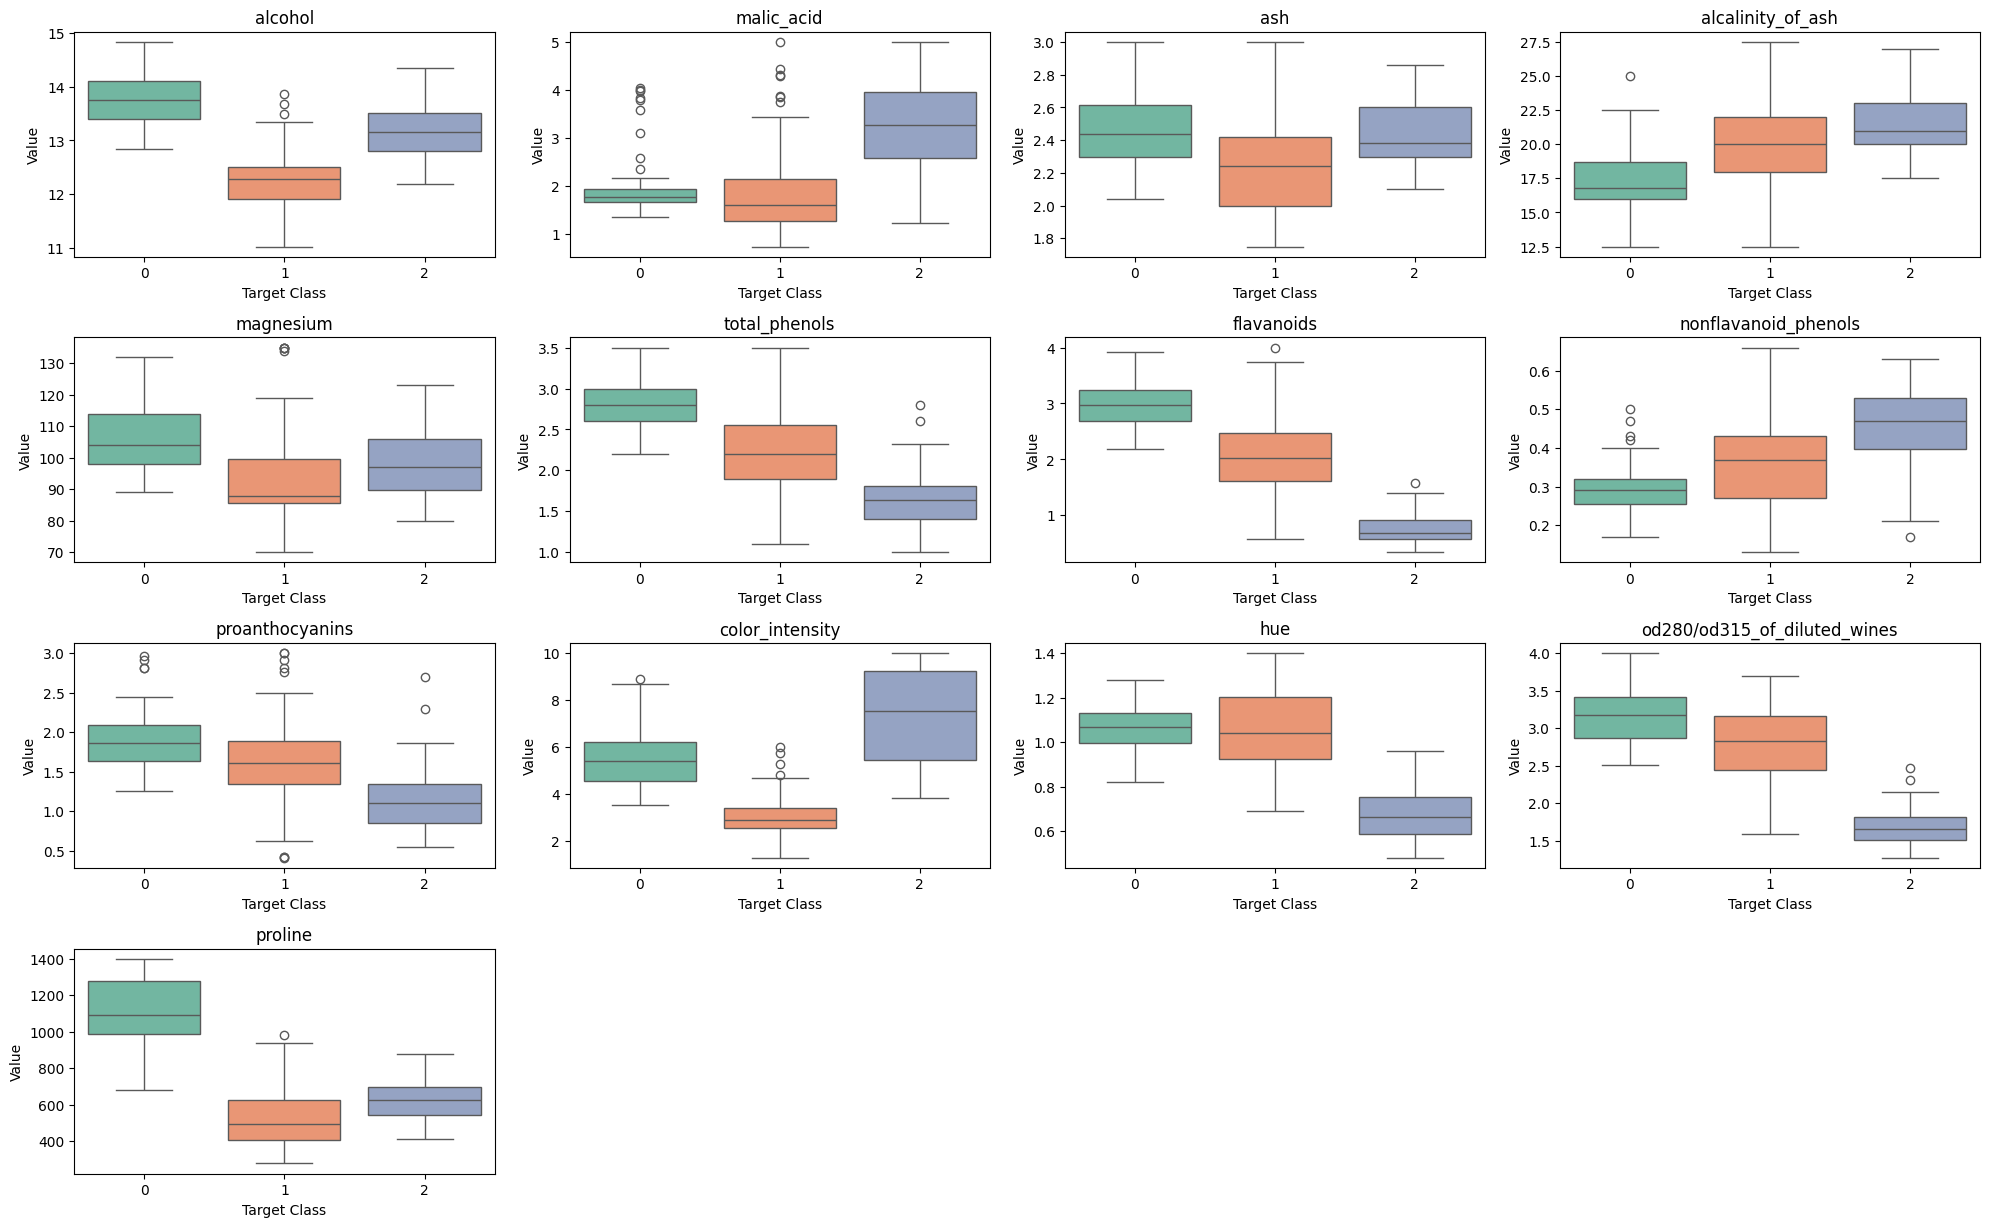

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=feature_dataframe.assign(target=target_dataframe['0']),
                x='target', y=col, hue='target', palette='Set2', dodge=False, legend=False)
    plt.title(col)
    plt.xlabel('Target Class')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


Boxplot Analysis :

  - Features such as flavanoids, proline, and od315_of_diluted_wines exhibit clear separations between wine classes.
  - All other feature also show separations with less

Anova :
 - Most feature have relatively high statistical correlation
 - with flavanoids proline and od280/od315_of_diluted_wines being the most correlated features.

** Anova is only here for comparison after transformation, it will not be taken seriously until skewness is fixed**

 Results :
 - All feature are selected for further analysis
 - Some require transformation for reducing skewness


## **7. Data Transformation (Fix skewness and normalizaation)**
Apply transformation
- malic_acid : log10
- magnesium: log2
- nonflavanoid_phenols: sqrt
- color intensity: sqrt
- proline: log10

In [ ]:
selected_feature = 'malic_acid'
feature_dataframe[selected_feature] = np.log10(feature_dataframe[selected_feature])

In [ ]:
selected_feature = 'magnesium'
feature_dataframe[selected_feature] = np.log2(feature_dataframe[selected_feature])

In [ ]:
selected_feature = 'nonflavanoid_phenols'
feature_dataframe[selected_feature] = np.sqrt(feature_dataframe[selected_feature])

In [ ]:
selected_feature = 'color_intensity'
feature_dataframe[selected_feature] = np.sqrt(feature_dataframe[selected_feature])

In [ ]:
selected_feature = 'proline'
feature_dataframe[selected_feature] = np.log10(feature_dataframe[selected_feature])

### Changes after Skew treatment

alcohol is skewed by -0.051482331077134784
malic_acid is skewed by 0.23115602783104736
ash is skewed by -0.15000380787439294
alcalinity_of_ash is skewed by 0.2025783650247232
magnesium is skewed by 0.3472156765549995
total_phenols is skewed by 0.007708005218396202
flavanoids is skewed by -0.07933164444850026
nonflavanoid_phenols is skewed by 0.13801799866833334
proanthocyanins is skewed by 0.35081104824530923
color_intensity is skewed by 0.2682627326029612
hue is skewed by -0.14616432405215163
od280/od315_of_diluted_wines is skewed by -0.30728549895848106
proline is skewed by 0.03400152154320699


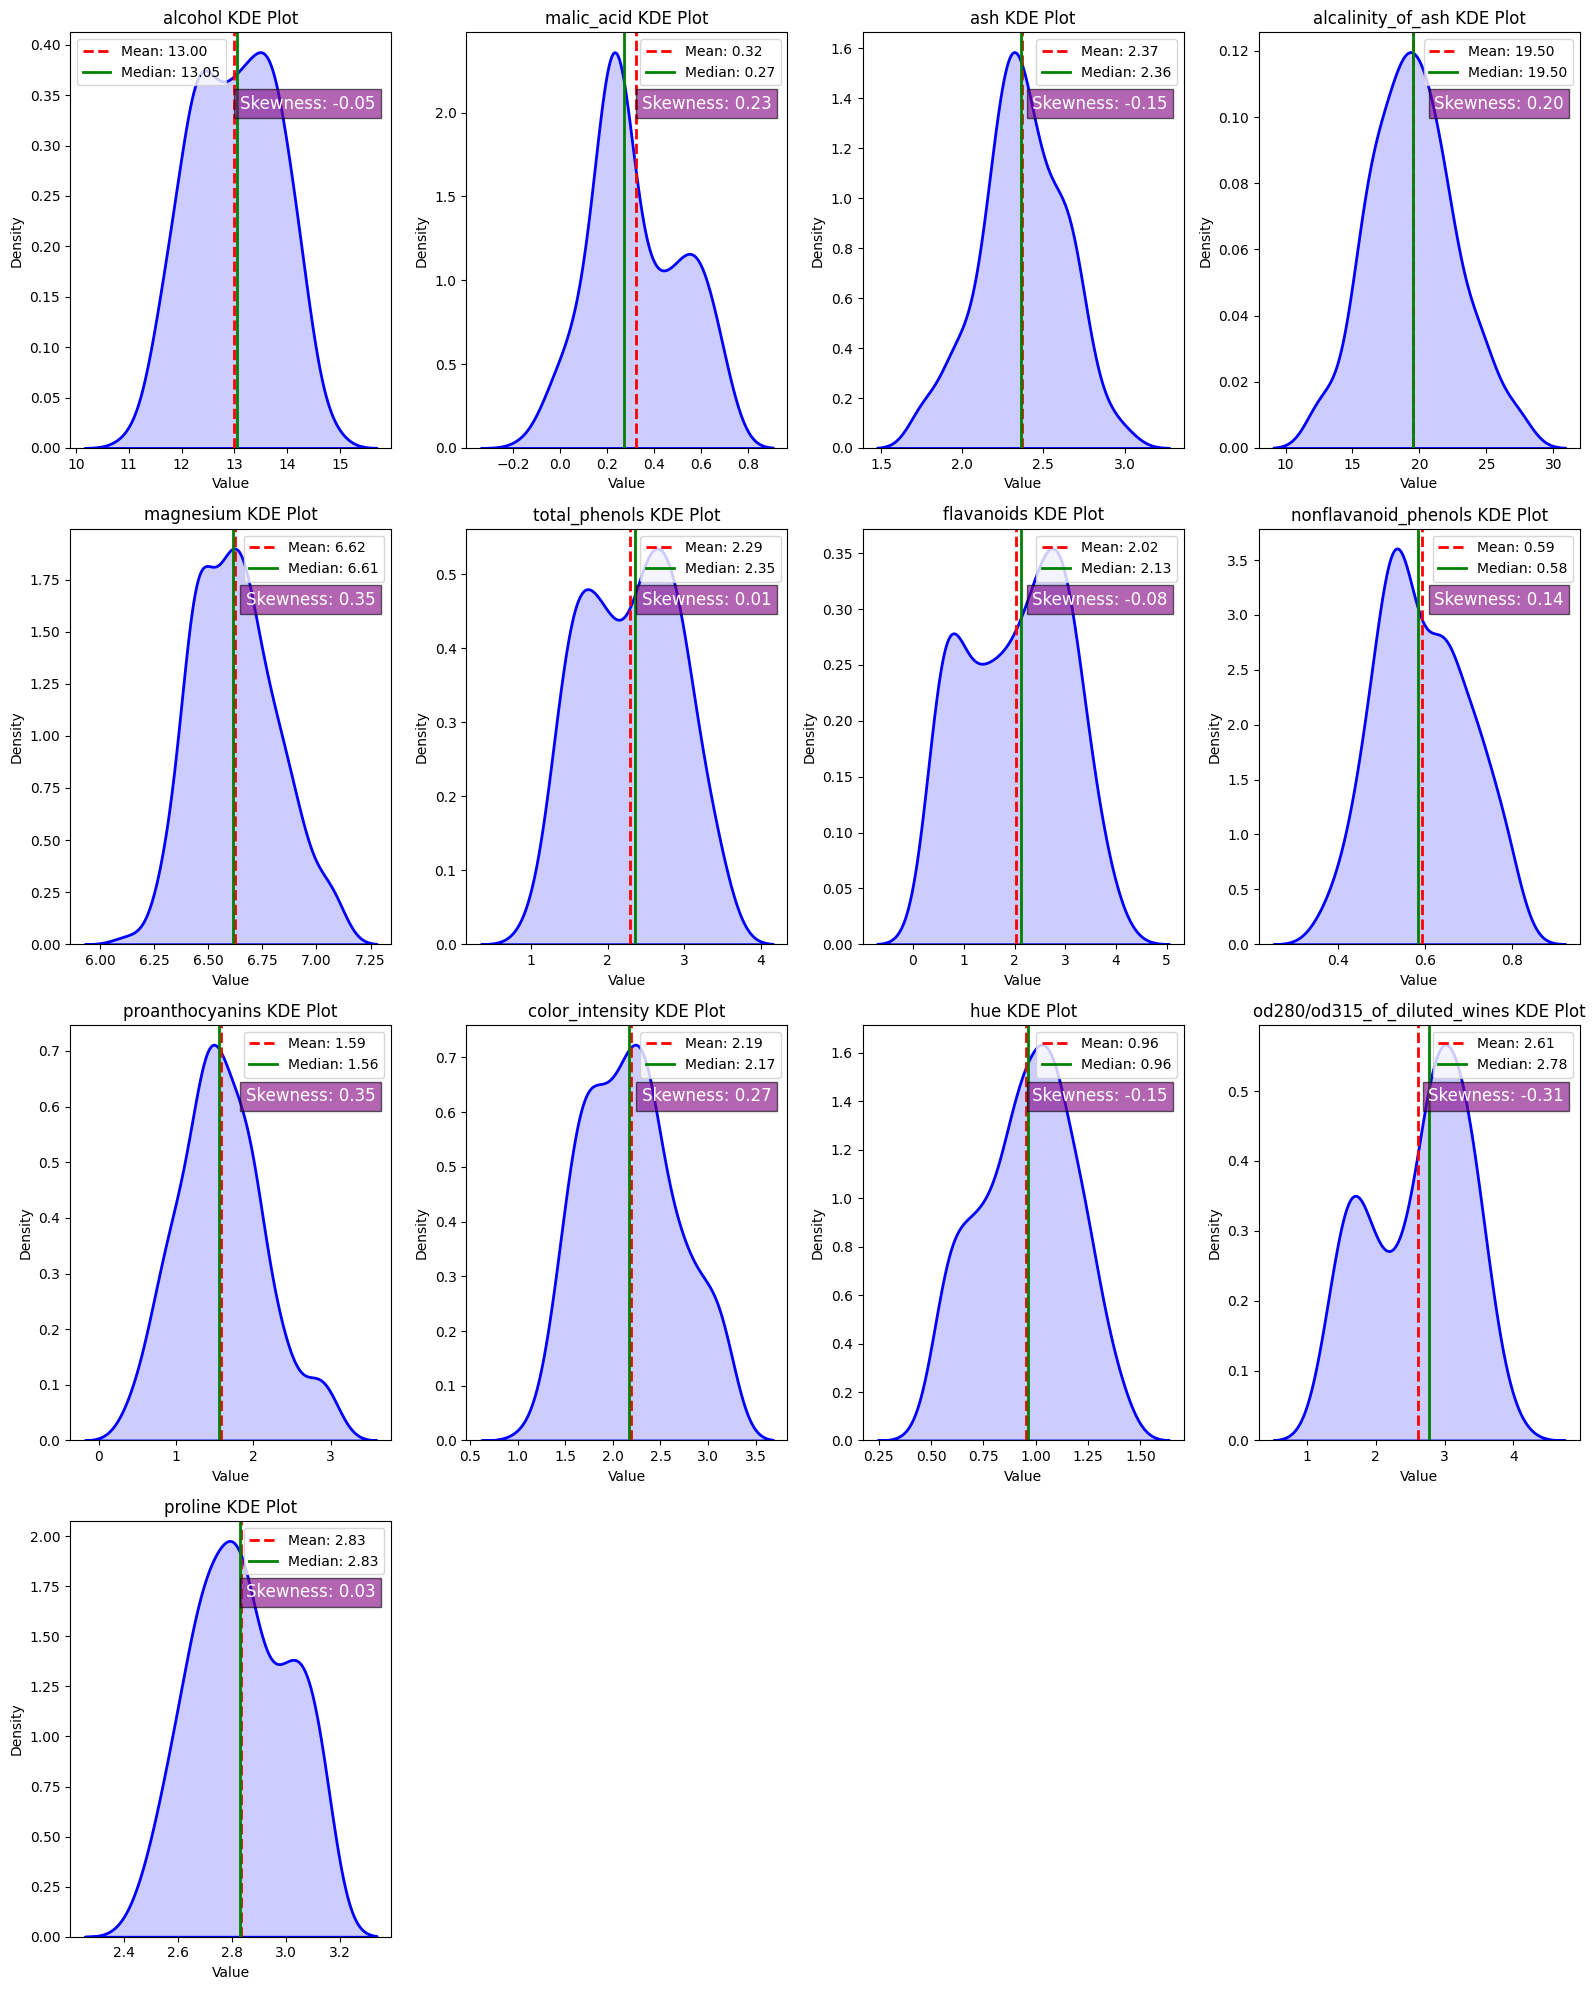

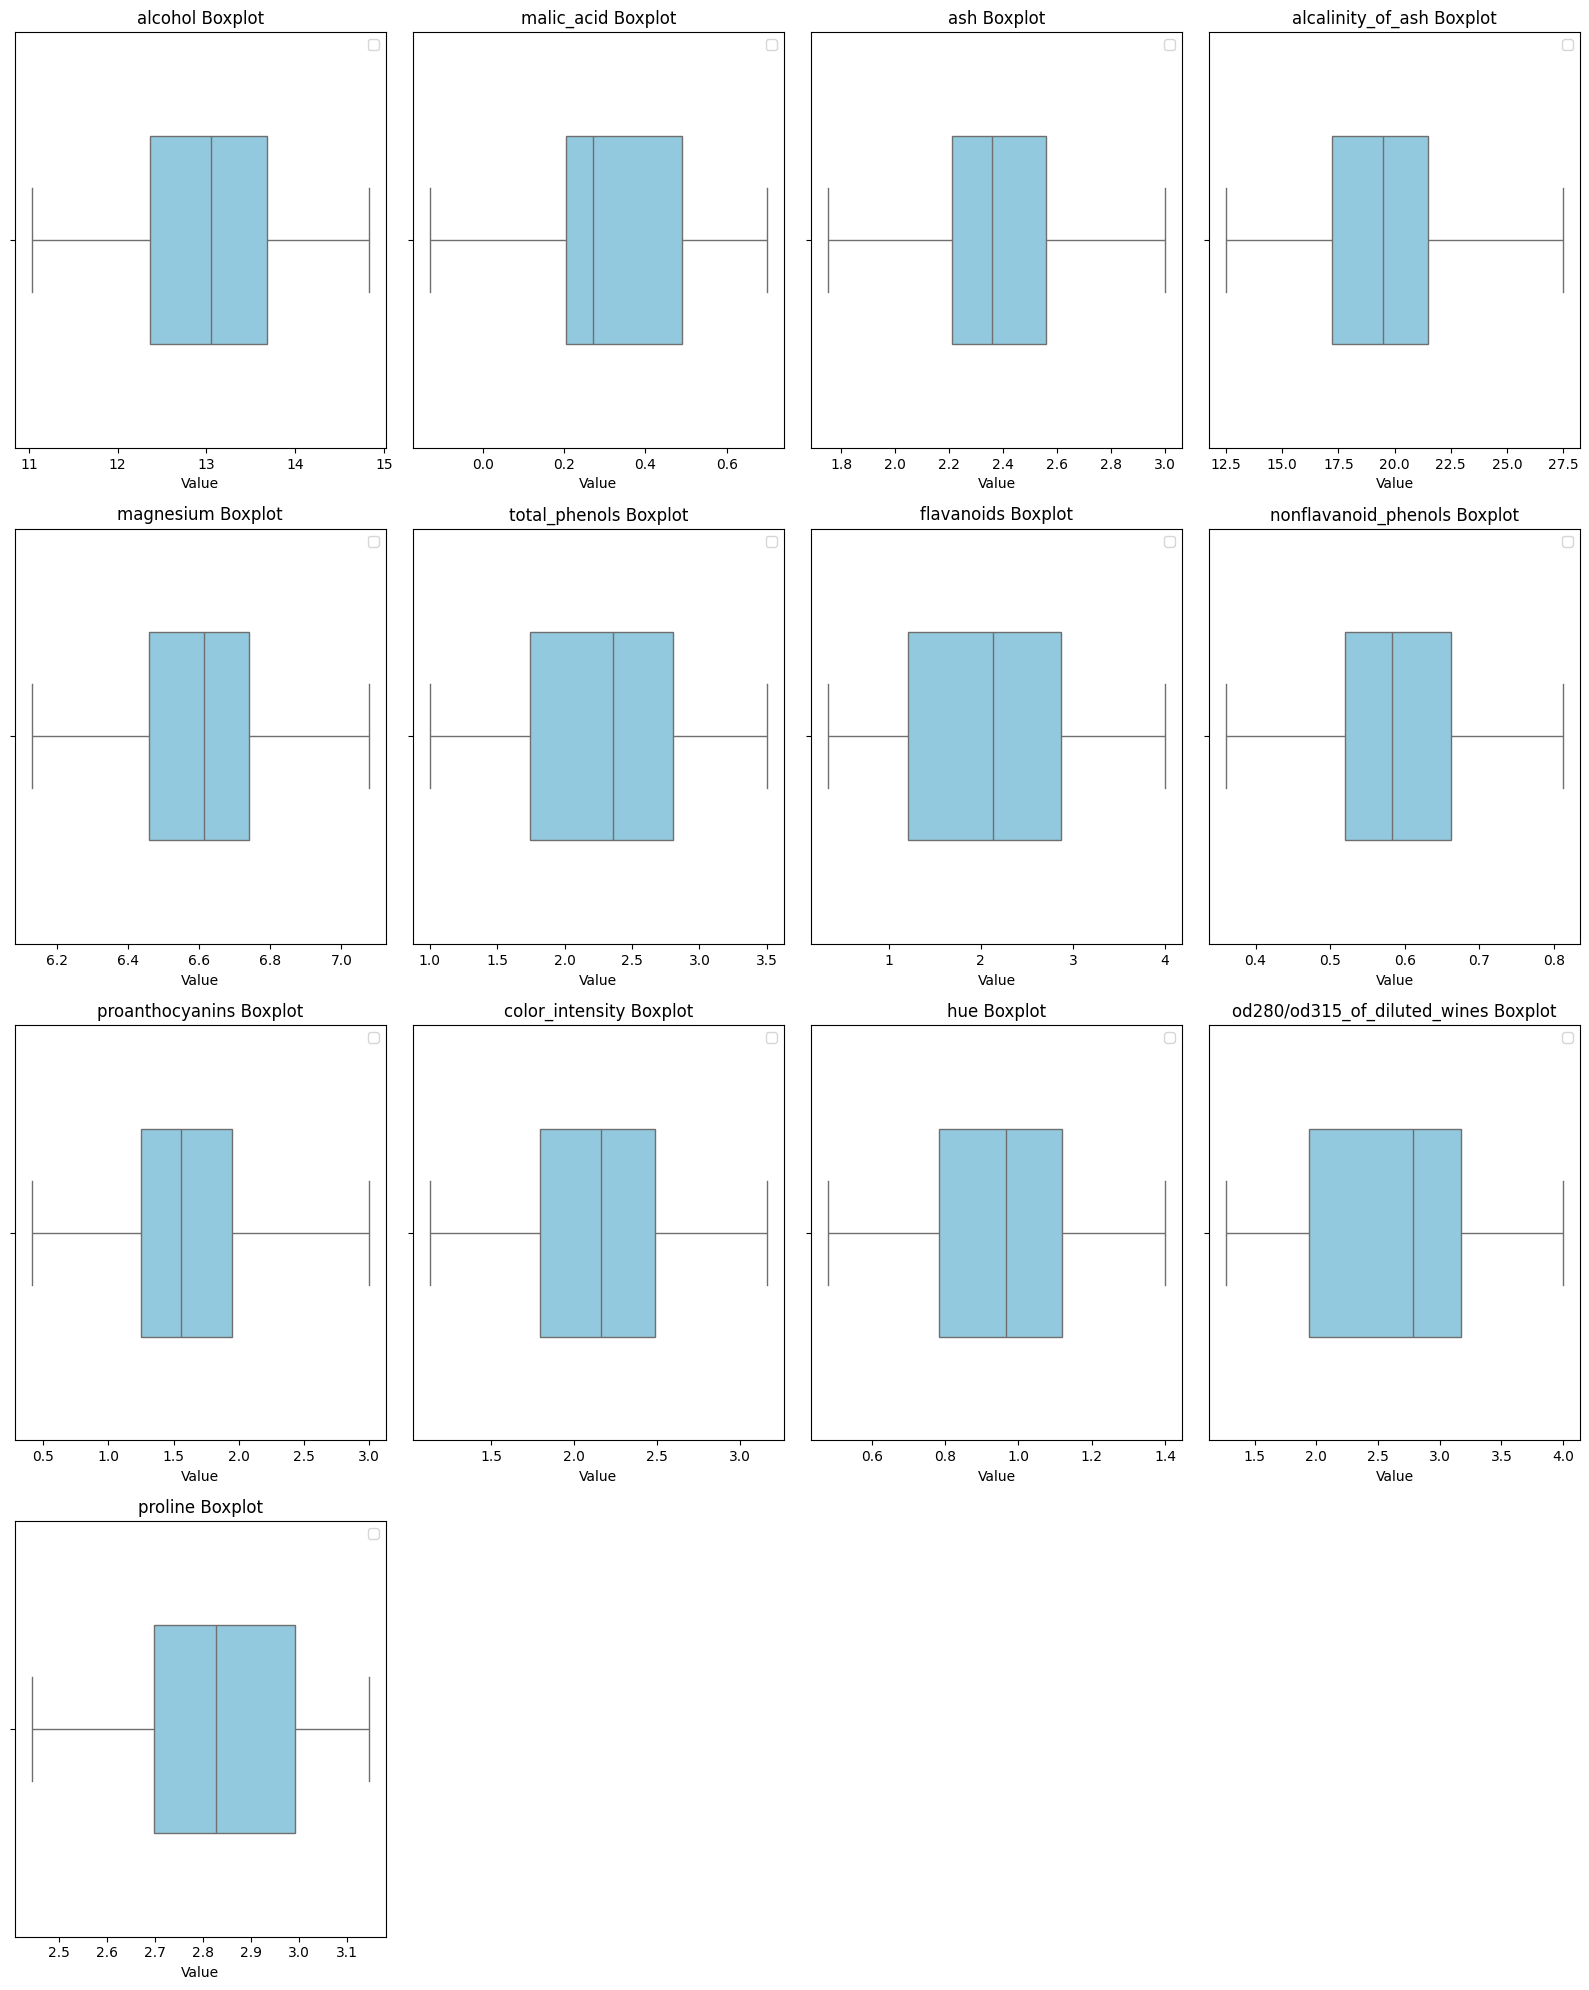

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot KDE
    sns.kdeplot(feature_dataframe[col], color='blue', linewidth=2, fill=True, alpha=0.2)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()
    print(f'{col} is skewed by {skewness}')
    # Plot mean and median lines
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add skewness text with a background for visibility
    plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} KDE Plot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(4, 4, i + 1)

    # Plot the boxplot
    sns.boxplot(data=feature_dataframe, x=col, color='skyblue', width=0.5)

    # Calculate statistics
    mean_val = feature_dataframe[col].mean()
    median_val = feature_dataframe[col].median()
    skewness = feature_dataframe[col].skew()

    # # Plot mean and median as vertical lines
    # plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    # plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # # Add skewness text with background box
    # plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
    #          ha='right', va='top', fontsize=12, color='white', bbox=dict(facecolor='purple', alpha=0.6))

    # Add titles and labels
    plt.title(f'{col} Boxplot')
    plt.xlabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()


####Report fixing Skewed Data
- before and after treatments of data
  - malic_acid:
    - Before Transformation: Heavily skewed high values.
    - After Transformation: Distribution appears more symmetrical, with reduced skewness. Values are compressed into a smaller range.
  - magnesium:
    - Before Transformation:higher values at the tail.
    - After Transformation:values better distributed around the mean.
  - nonflavanoid_phenols:
    - Before Transformation: Light skew with minor outliers.
    - After Transformation: slightly improved symmetry, with minimal impact on data distribution.
  - color_intensity:
    - Before Transformation: Moderately skewed with extreme outliers.
    - After Transformation:made the distribution more compact.
  - proline:
    - Before Transformation: Highly skewed due to extreme outliers in higher values.
    - After Transformation: reducing skewness significantly while preserving variability.

Overall :
- distribution are improved with skewness <0.31 which is a very good distribution (most likely due to the data being preprocessed by sklearn)

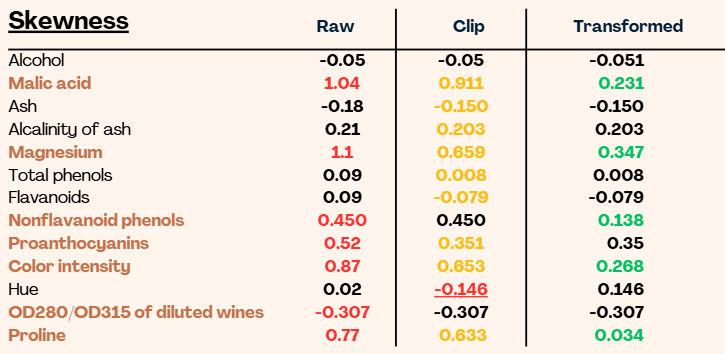

### Normalized data to 0 to 1 using min max

In [ ]:
for i, col in enumerate(feature_dataframe.columns):
    min_val = feature_dataframe[col].min()
    max_val = feature_dataframe[col].max()
    feature_dataframe[col] = (feature_dataframe[col] - min_val) / (max_val - min_val)
    print(feature_dataframe[col])

0      0.842105
1      0.571053
2      0.560526
3      0.878947
4      0.581579
         ...   
173    0.705263
174    0.623684
175    0.589474
176    0.563158
177    0.815789
Name: alcohol, Length: 178, dtype: float64
0      0.438409
1      0.459408
2      0.607035
3      0.507151
4      0.655710
         ...   
173    1.000000
174    0.871293
175    0.918617
176    0.655710
177    0.896129
Name: malic_acid, Length: 178, dtype: float64
0      0.544
1      0.312
2      0.736
3      0.600
4      0.896
       ...  
173    0.560
174    0.584
175    0.408
176    0.496
177    0.792
Name: ash, Length: 178, dtype: float64
0      0.206667
1      0.000000
2      0.406667
3      0.286667
4      0.566667
         ...   
173    0.533333
174    0.700000
175    0.500000
176    0.500000
177    0.800000
Name: alcalinity_of_ash, Length: 178, dtype: float64
0      0.906989
1      0.543066
2      0.558217
3      0.729153
4      0.795076
         ...   
173    0.464968
174    0.573218
175    0.820666
176 

####Report Normalized data min 0 - max 1
- using formula x = x-min / (max - min)
for rescaling
 - 0 represents the minimum value in the column.
 - 1 represents the maximum value in the column.

## **8. Final Feature Selection (with visual and statistical correlation)**

We use Visual correlation and Anova to finalize transformed feature

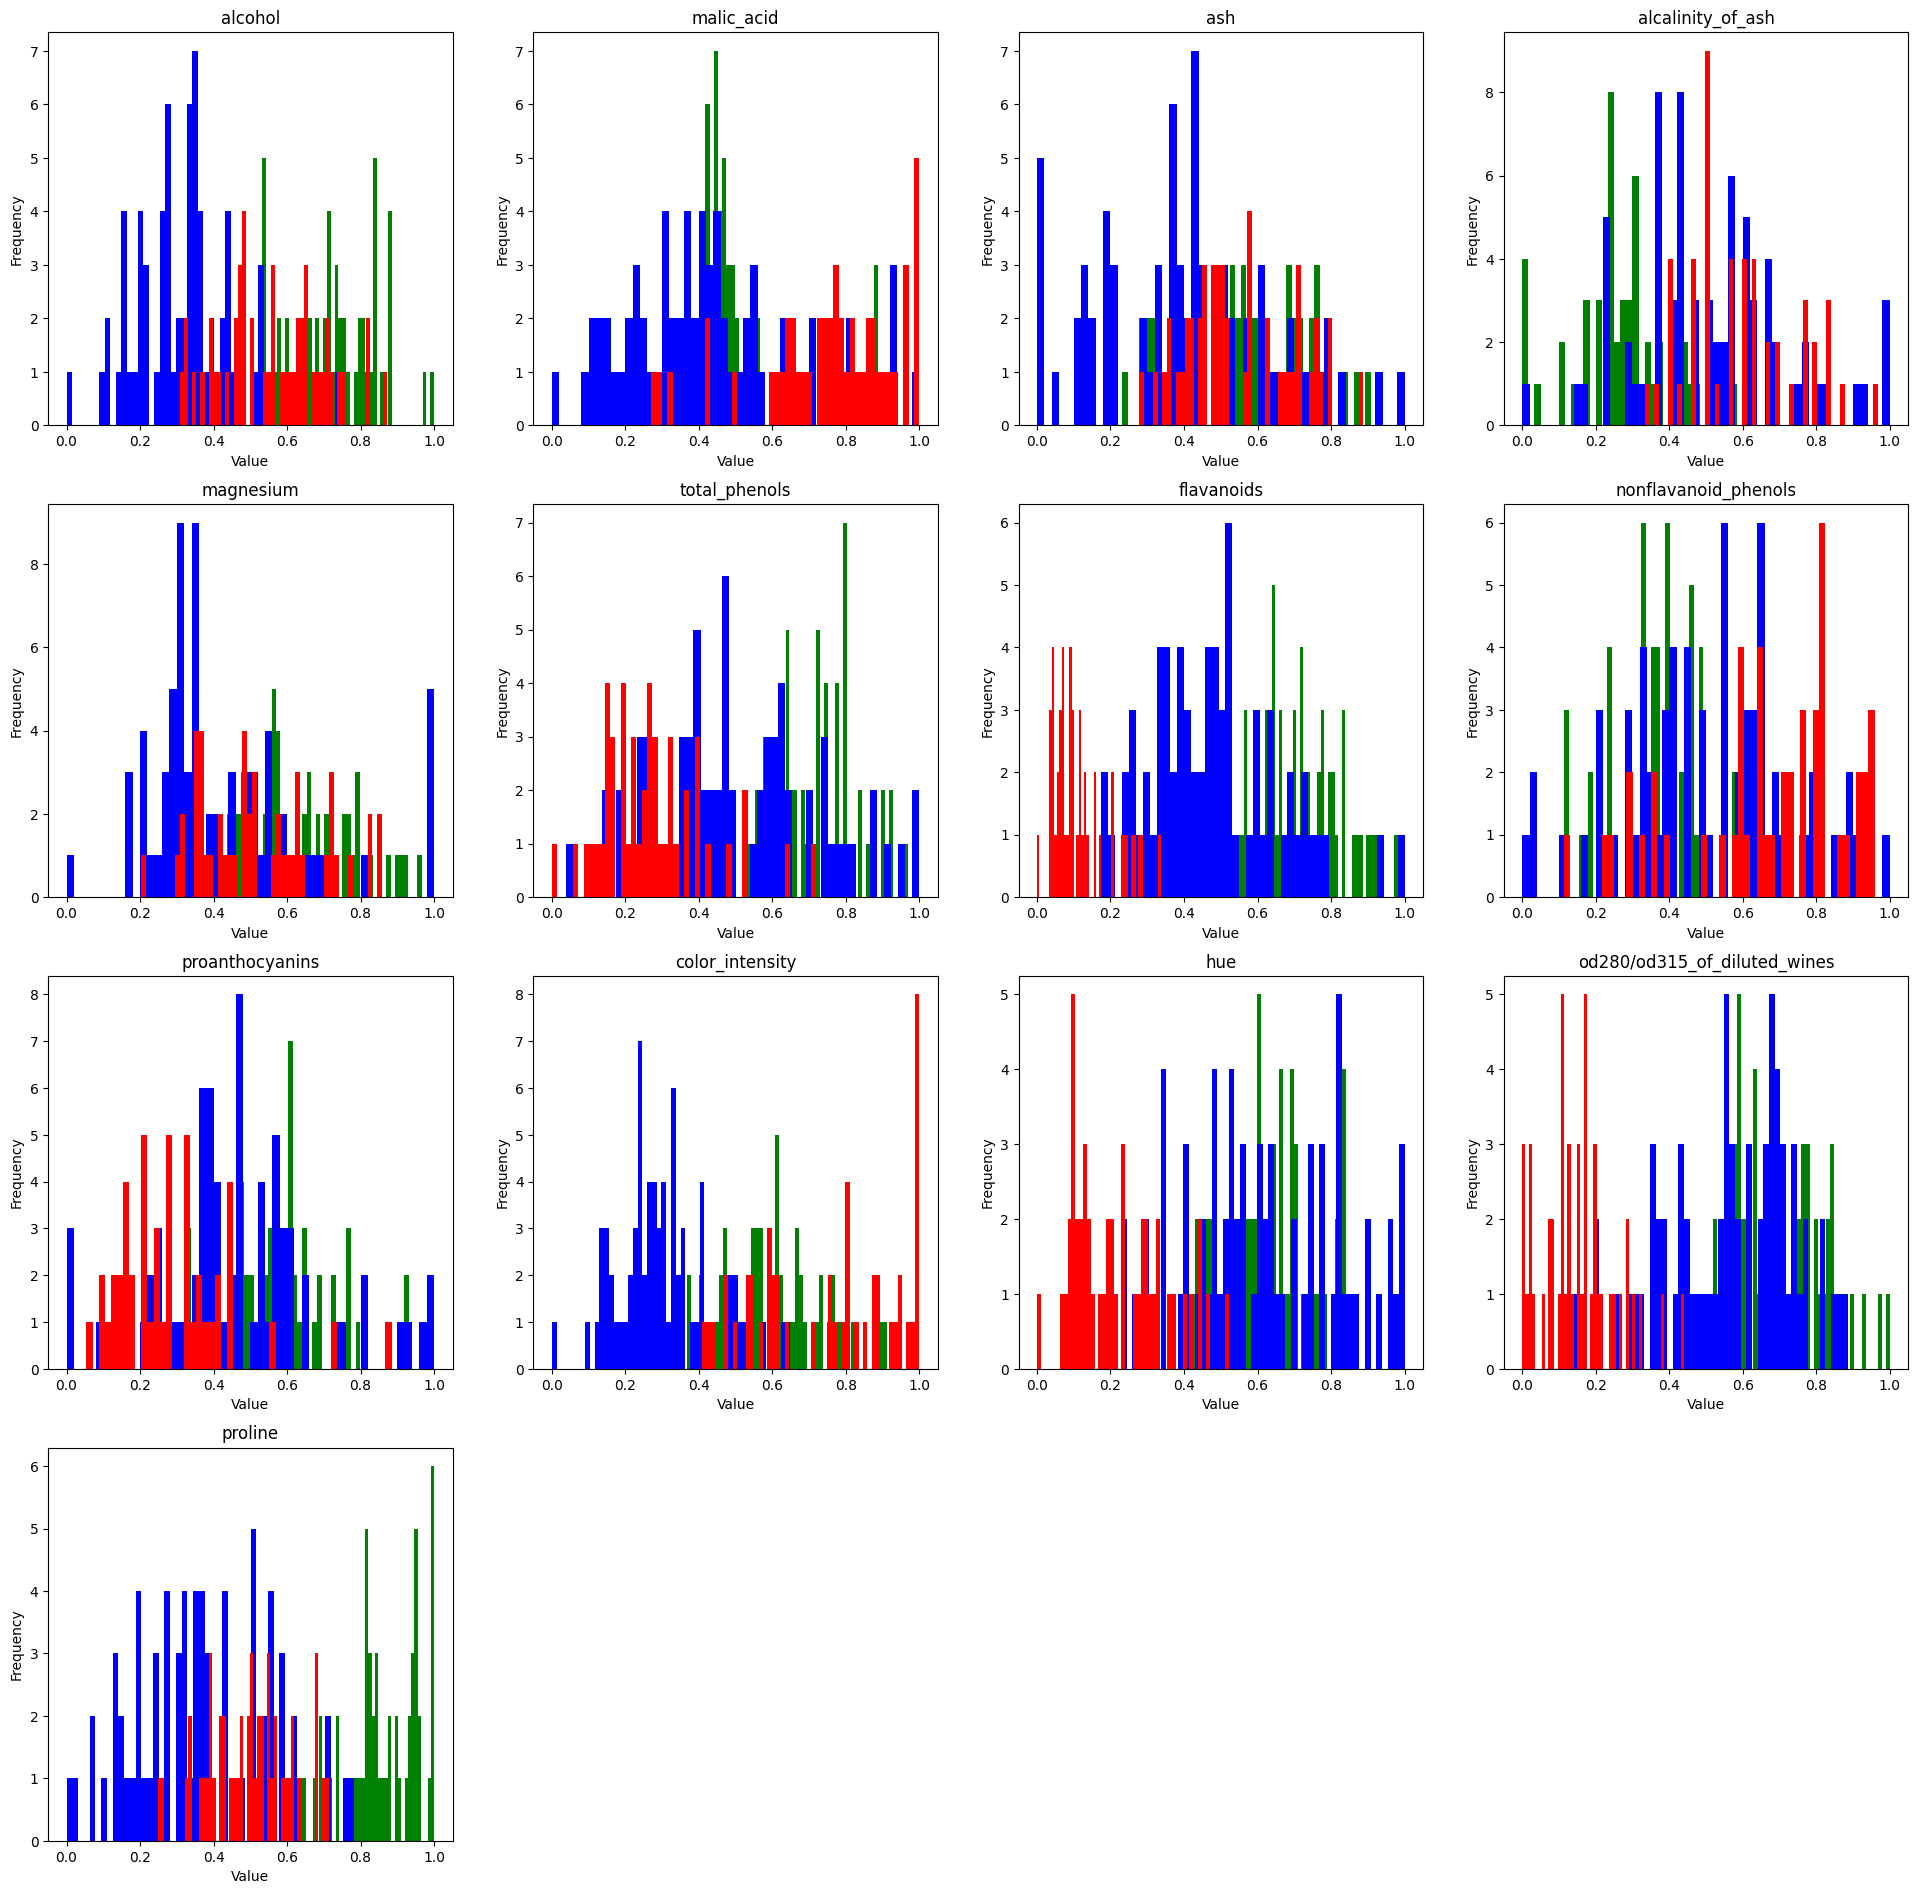

In [ ]:
col = 'alcohol'
plt.figure(figsize=(24,48))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(8, 4, i + 1)

    plt.hist(feature_dataframe.loc[target_dataframe[target_dataframe['0'] == 0].index,col], bins=50, color='green')
    plt.hist(feature_dataframe.loc[target_dataframe[target_dataframe['0'] == 1].index,col], bins=50, color='blue')
    plt.hist(feature_dataframe.loc[target_dataframe[target_dataframe['0'] == 2].index,col], bins=50, color='red')

    plt.title(f'{col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.show()

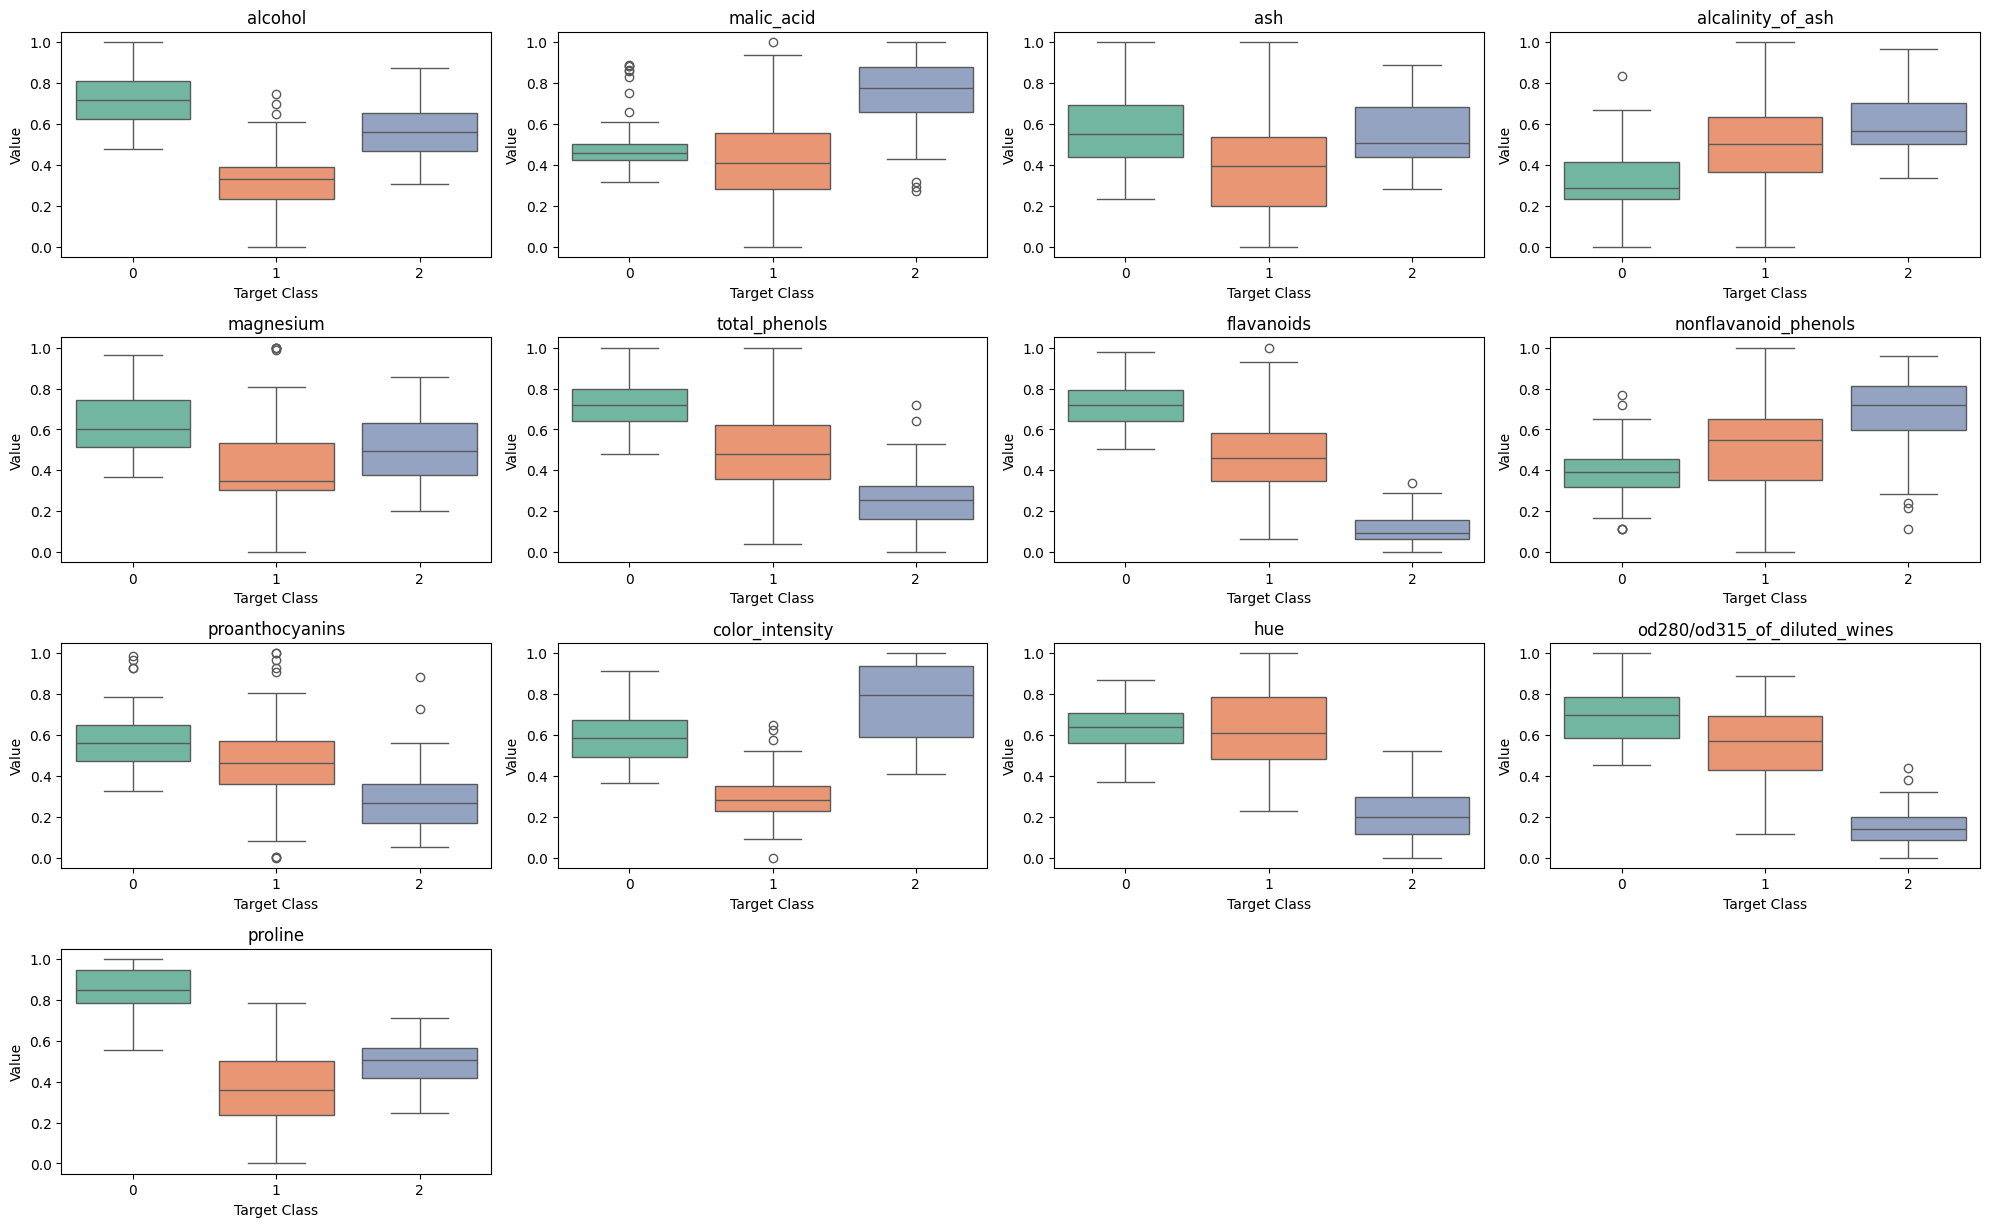

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(feature_dataframe.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=feature_dataframe.assign(target=target_dataframe['0']),
                x='target', y=col, hue='target', palette='Set2', dodge=False, legend=False)
    plt.title(col)
    plt.xlabel('Target Class')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Perform ANOVA F-test
f_scores, p_values = f_classif(feature_dataframe, target_dataframe['0'])

# Organize results into a DataFrame
anova_results = pd.DataFrame({"Feature": feature_dataframe.columns, "F-Score": f_scores, "p-value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)

print(anova_results)


                         Feature     F-Score       p-value
6                     flavanoids  262.876700  1.900523e-53
11  od280/od315_of_diluted_wines  189.972321  1.393105e-44
12                       proline  184.593225  7.725088e-44
9                color_intensity  148.475251  1.994756e-38
0                        alcohol  135.077624  3.319504e-36
10                           hue  109.024422  1.785494e-31
5                  total_phenols   95.359625  9.781266e-29
3              alcalinity_of_ash   38.384912  1.506633e-14
1                     malic_acid   38.337187  1.557461e-14
8                proanthocyanins   32.226997  1.213101e-12
7           nonflavanoid_phenols   25.545340  1.845425e-10
4                      magnesium   19.188506  2.920194e-08
2                            ash   14.161322  1.993317e-06


### Result of feature selection

Visual correlation :
- There was only a slight change.
- Overall feature seem more separatedly apart, althought it is hard to be seen with eye
- Statistical comparison is more effective in this case

Anova (Statistical correlation) :
- There's a slight change in ranking with od. turning out to be more correlated than proline.


Selected Feature
- All features are still highly correlated which mean all of them can be used for training.*italicized text

## **9. Fit data to SVM (base model for this training)**

---


Note: use backward feature selection to find best feature set to use

SVM (Support Vector Machine) model with a linear kernel. The model is trained on a subset of features selected using Backward Feature Selection (BFS) and is evaluated using various metrics, including accuracy, ROC-AUC score, and confusion matrix.

- Dataset Split:
    - 80% of the data was used for training.
    - 20% of the data was reserved for testing.
    - The split was done randomly with random_state=420

- Feature Selection
Backward Feature Selection :
    - Used to select the 8 most important features for the SVM model.
    - BFS iteratively removes less important features until the desired number of features is reached.

- Model Training
    - The model was trained using the selected features on the training dataset.

In [ ]:
# Import nescessary package
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score

In [ ]:
# Split data for train and testing model
train_index, test_index = train_test_split(feature_dataframe, train_size=0.8, random_state= 420, shuffle=True)
train_index = train_index.index
test_index = test_index.index

# From index, split the dataframe
train_feature = feature_dataframe.loc[train_index]
test_feature = feature_dataframe.loc[test_index]
train_target = target_dataframe.loc[train_index]
test_target = target_dataframe.loc[test_index]


In [ ]:
# Choose feature using backward feature selection
model = SVC(kernel='linear')
BFE = SequentialFeatureSelector(estimator=model, n_features_to_select=8, direction='backward')
BFE.fit(train_feature, train_target['0'])

print("Used feature: ", BFE.support_)

Used feature:  [False  True  True  True False False  True False False  True  True  True
  True]


In [ ]:
# From selected feature, fit them to SVM model

real_train_feature = BFE.transform(train_feature)
real_test_feature = BFE.transform(test_feature)

model.fit(real_train_feature, train_target['0'])


SVC(kernel='linear')

In [ ]:
# Get accuracy score

score = model.score(real_test_feature, test_target['0'])
print("Model score is ", score)

Model score is  0.9444444444444444


In [ ]:
from sklearn.metrics import roc_auc_score

model = SVC(kernel='linear', probability=True)
model.fit(real_train_feature, train_target['0'])

# Get probabilities for the test set
test_probs = model.predict_proba(real_test_feature)

# Calculate the AUC score with `multi_class='ovr'`
auc_score = roc_auc_score(test_target['0'], test_probs, multi_class='ovr')
print("Model ROC-AUC score is", auc_score)



Model ROC-AUC score is 0.9953703703703703


In [ ]:
# Confusion matrix attempt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_train = train_target['0']
y_test = test_target['0']

y_train_pred = model.predict(real_train_feature)
y_test_pred = model.predict(real_test_feature)

accuracy_train = model.score(real_train_feature, y_train)
accuracy_test = model.score(real_test_feature, y_test)

# Evaluate on training data
print("Training Results")
print("Accuracy:", accuracy_train)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("*" * 100)
# Evaluate on test data
print("Testing Results")
print("Accuracy:", accuracy_test)
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        41

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

Confusion Matrix:
 [[42  0  0]
 [ 0 59  0]
 [ 0  0 41]]
****************************************************************************************************
Testing Results
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      0.92      0.92        12
           2       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Confu

####Report Of fit Data to SVM
   
- Accuracy
    - Training Accuracy:
      - The model perfectly classified all samples in the training set.
        - Precision: 1.0 for all classes, meaning no false positives.
        - Recall: 1.0 for all classes, meaning no false negatives.
        - F1-Score: 1.0 for all classes, showing perfect balance between precision and recall.
    - Testing Accuracy:
      - The model maintains high accuracy on unseen data, demonstrating good generalization.
        - Precision: Slightly lower for Class 2, indicating some false positives.
        - Recall: Perfect for Class 2 but slightly lower for Class 0 .
        - F1-Score: High overall, but slightly lower for Class 2, suggesting a slight imbalance between precision and recall for this class.

## **10. Model Comparison**

#### Model Comparison
  - Model Using
    - SVM
    - Logistic Regression
    - K-NN
    - Random Forest
  - Key Metrics Used for Evaluation
    - Training Accuracy: Measures how well the model fits the training data.
    - Testing Accuracy: Indicates the model's generalization performance on unseen data.
    - ROC-AUC Score: Evaluates the model's ability to distinguish between classes.
    - Classification Report: Provides detailed metrics for precision, recall, and F1-score for each class.
    - Confusion Matrix: Summarizes true and false for all classes.

  - Best model that fit in data
    - SVM and Logistic Regression


In [ ]:
# Import necessary packages
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to evaluate and compare model performance on training and testing sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Fits the model on the training data, then evaluates performance on both training
    and testing datasets. It calculates accuracy, confusion matrix, ROC-AUC score,
    and provides a detailed classification report for each dataset.
    """
    # Predictions for both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC (only for SVC models with `probability=True`)
    y_test_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Calculate accuracy for both sets
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate ROC-AUC score if probabilities are available (for the test set)
    if y_test_proba is not None:
        auc_score = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    else:
        auc_score = "Not applicable for this model"

    # Display accuracy scores
    print("Training Accuracy:", accuracy_train)
    print("Testing Accuracy:", accuracy_test)
    print("\nModel ROC-AUC Score (Testing):", auc_score)

    # Classification reports
    print("\nClassification Report (Training):\n", classification_report(y_train, y_train_pred))
    print("\nClassification Report (Testing):\n", classification_report(y_test, y_test_pred))

    # Confusion matrices
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Visualize Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Confusion Matrix (Training Set)")
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")

    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title("Confusion Matrix (Testing Set)")
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")

    plt.show()



Evaluating Support Vector Machine (SVM)
Training Accuracy: 1.0
Testing Accuracy: 0.9444444444444444

Model ROC-AUC Score (Testing): 0.9976851851851851

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        41

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      0.92      0.92        12
           2       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



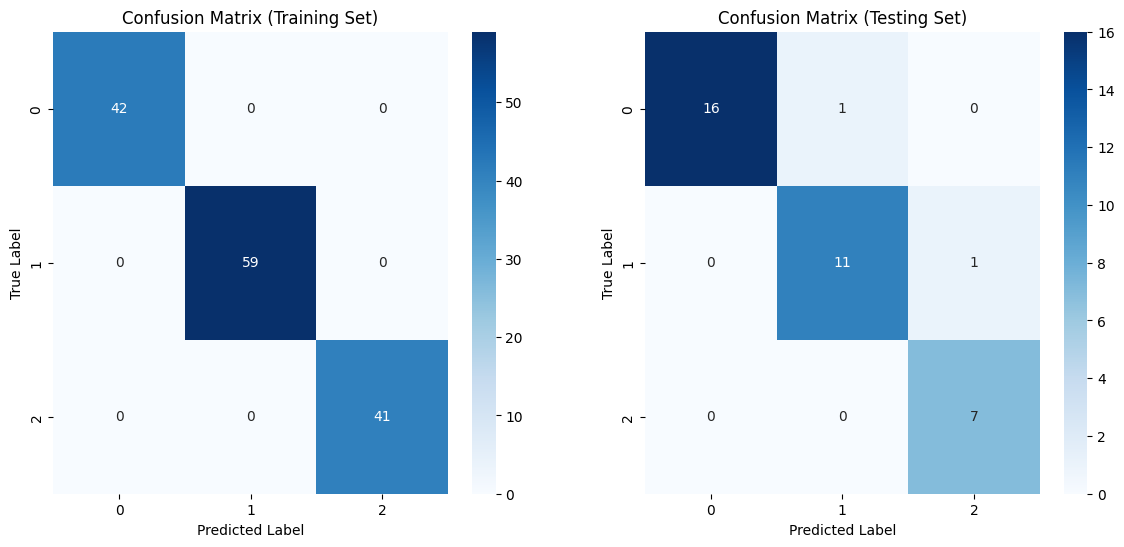


Evaluating Logistic Regression
Training Accuracy: 1.0
Testing Accuracy: 0.9444444444444444

Model ROC-AUC Score (Testing): 0.9976851851851851

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        41

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      0.92      0.92        12
           2       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



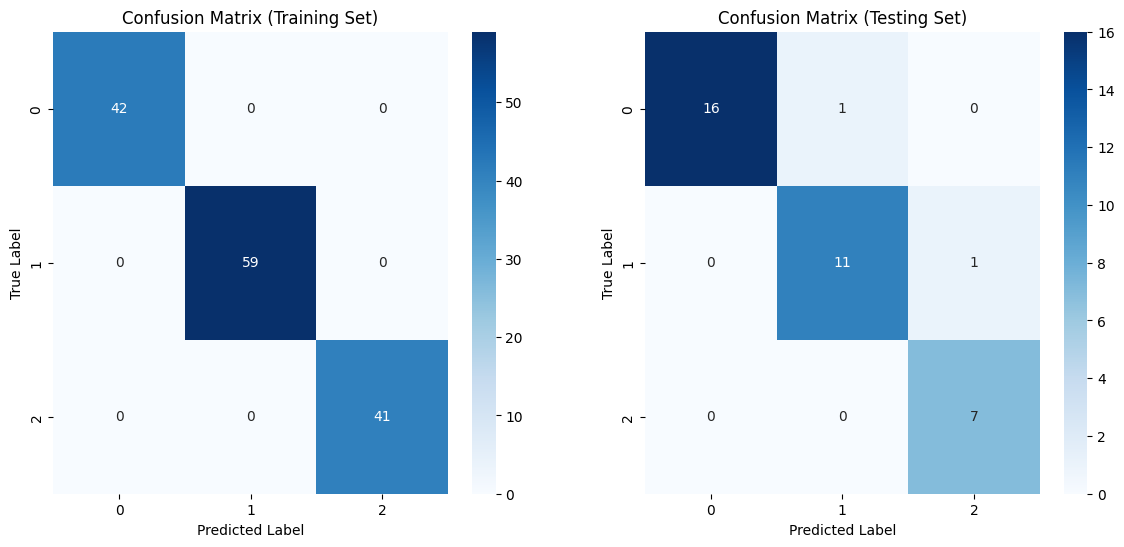


Evaluating K-Nearest Neighbors (KNN)
Training Accuracy: 0.9647887323943662
Testing Accuracy: 0.9166666666666666

Model ROC-AUC Score (Testing): 0.9947916666666666

Classification Report (Training):
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       0.98      0.93      0.96        59
           2       0.98      0.98      0.98        41

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.91      0.83      0.87        12
           2       0.78      1.00      0.88         7

    accuracy                           0.92        36
   macro avg       0.90      0.92      0.90        36
weighted avg       0.93      0.92      0.92        36



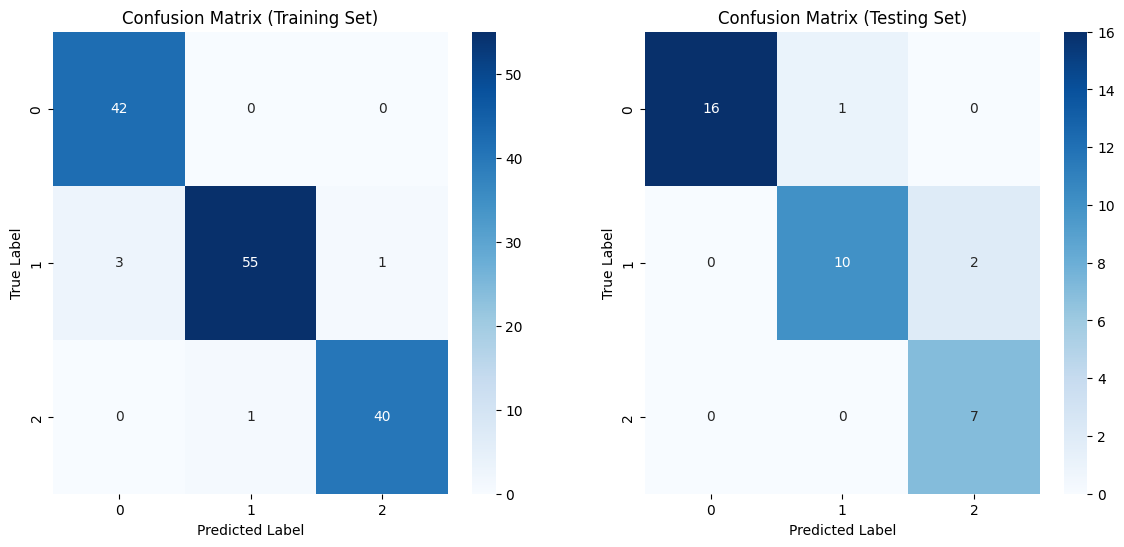


Evaluating Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.9166666666666666

Model ROC-AUC Score (Testing): 0.9976851851851851

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        41

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.85      0.92      0.88        12
           2       0.88      1.00      0.93         7

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



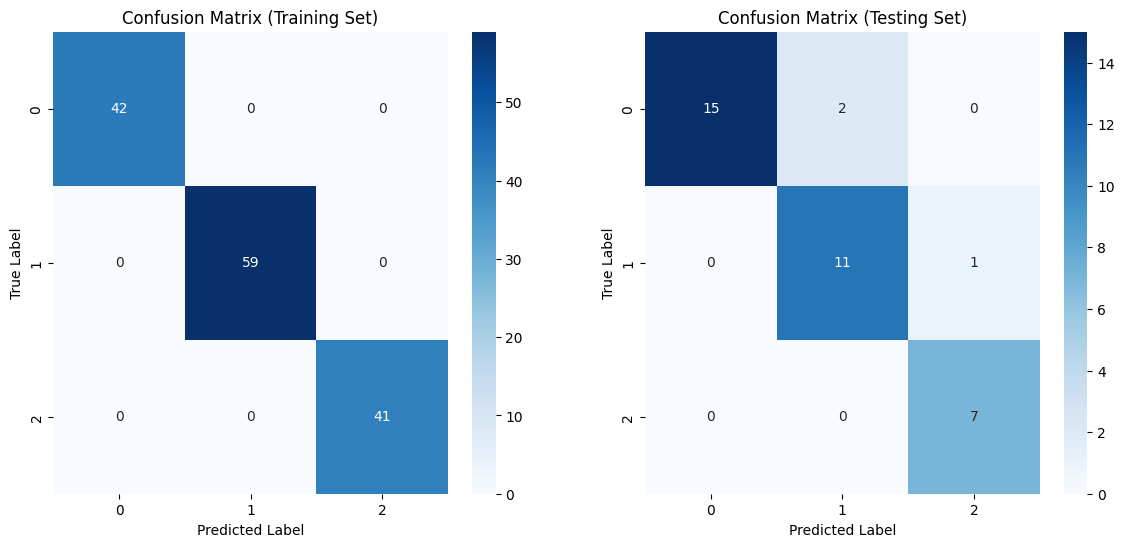

In [ ]:
# Import additional classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Define the classifiers to compare
classifiers = {
    'Support Vector Machine (SVM)': SVC(kernel='linear', probability=True, random_state=420),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=420),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=420)
}

# Iterate over classifiers, fit each model, and evaluate
for model_name, model in classifiers.items():
    print(f"\n{'='*30}\nEvaluating {model_name}\n{'='*30}")
    # Train the model on the training data
    model.fit(real_train_feature, train_target['0'])

    # Use the evaluation function defined above
    evaluate_model(model, real_train_feature, train_target['0'], real_test_feature, test_target['0'])


Here’s an evaluation and comparison of the models' results on the *load_wine* dataset:

---

### **Comparison of Results**

| Metric                | SVM          | Logistic Regression | KNN           | Random Forest  |
|-----------------------|--------------|---------------------|---------------|----------------|
| **Training Accuracy** | 1.0          | 1.0                 | 0.9648        | 1.0            |
| **Testing Accuracy**  | 0.9444       | 0.9444              | 0.9167        | 0.9167         |
| **ROC-AUC**           | 0.9977       | 0.9977              | 0.9948        | 0.9977         |
| **Testing Macro F1**  | 0.94         | 0.94                | 0.90          | 0.92           |

---

### **Analysis of Results**

#### **1. Support Vector Machine (SVM)**
**Performance**: Best in this data set, low overfit
- SVMs are effective for small-to-medium datasets like *load_wine*,
- especially when the dataset is well-balanced and the features are informative. (like this case)
- They work well when the classes are linearly separable.


- SVM is suitable here due to the limited dataset size and the structured feature space. with low Overfitting.

---

#### **2. Logistic Regression**
**Performance**: Logistic Regression matches SVM in both accuracy and ROC-AUC.
- Logistic Regression works well when classes are linearly separable It's also robust with smaller datasets and doesn’t overfit easily.

- **Suitability**: Highly suitable for this case due to the relatively small number of samples and the simplicity of relationships between features and target classes.

---

#### **3. K-Nearest Neighbors (KNN)**
**Performance**: KNN underperforms slightly compared to SVM and Logistic Regression, (decent precision, low recall).

  - KNN is sensitive to the number of samples and their distribution in feature space. because might not provide enough neighbors for robust decision boundaries.
  - imbalanced class distribution can effect the model.
  
- **Suitability**: KNN is less suitable for *load_wine* due to its sensitivity to small sample sizes and reliance on distance metrics, which may not be ideal for the feature relationships in this dataset.

---

#### **4. Random Forest**
Performance: High accuracy but slightly overfits (perfect training accuracy, lower testing accuracy).

- Handles non-linear relationships well, though they may not be needed for this dataset.
- can use for small datasets but it is not the without limiting tree depth
Leverages feature importance effectively, which might not add significant value in this case.

- **Suitability**: Suitable but less optimal for *load_wine*, as the dataset has low size increases overfitting risks.
(random forest is overly complex)


---

### **Recommendations**

1. **Best Model**:
- SVM and Logistic Regression are both great choices.
2. **Considerations**:
   - If interpretability is important, Logistic Regression should be preferred.
   - For robustness and flexibility, SVM is ideal.
3. **Less Effective Models**:
   - KNN struggles with small datasets and noisy boundaries, making it less suitable here.
   - Random Forest overfits slightly, which can be mitigated with parameter tuning, but simpler models already perform better.

In conclusion, for the *load_wine* dataset with its structured features and small sample size, SVM or Logistic Regression is the best choice.

In [ ]:
# Initialize a dictionary to store results for each classifier
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train Precision': [],
    'Test Precision': [],
    'Train Recall': [],
    'Test Recall': [],
    'Train F1-Score': [],
    'Test F1-Score': [],
    'ROC-AUC': [],
    'Confusion Matrix': []
}


# Function to evaluate model and store results in the dictionary
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_and_store_results(model_name, model, X_train, y_train, X_test, y_test):
    """
    Evaluates the model and stores accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
    """
    # Predictions and probabilities
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Precision, Recall, F1-Score
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # ROC-AUC score (if applicable)
    auc_score = roc_auc_score(y_test, y_test_proba, multi_class='ovr') if y_test_proba is not None else None

    # Store metrics in the results dictionary
    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Train Precision'].append(train_precision)
    results['Test Precision'].append(test_precision)
    results['Train Recall'].append(train_recall)
    results['Test Recall'].append(test_recall)
    results['Train F1-Score'].append(train_f1)
    results['Test F1-Score'].append(test_f1)
    results['ROC-AUC'].append(auc_score)
    results['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))



In [ ]:
# Run each classifier and store results
for model_name, model in classifiers.items():
    # Train the model
    model.fit(real_train_feature, train_target['0'])

    # Evaluate and store results
    evaluate_and_store_results(model_name, model, real_train_feature, train_target['0'], real_test_feature, test_target['0'])


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results dictionary to a DataFrame for easy plotting
results_df = pd.DataFrame(results)
# Line plot for Train and Test Accuracy
plt.figure(figsize=(10, 6))
# Plot training accuracy
sns.lineplot(x='Model', y='Train Accuracy', data=results_df, marker='o', color='skyblue', label="Train Accuracy")
# Plot testing accuracy
sns.lineplot(x='Model', y='Test Accuracy', data=results_df, marker='o', color='salmon', label="Test Accuracy")
plt.ylim(0.8, 1.1) # Improve y-axis range to focus on high accuracy if needed
plt.ylabel("Accuracy")
plt.title("Comparison of Train and Test Accuracy Across Models")

# Display exact accuracy values on the plot
for i, (train_acc, test_acc) in enumerate(zip(results_df['Train Accuracy'], results_df['Test Accuracy'])):
    plt.text(i, train_acc + 0.005, f"{train_acc:.3f}", ha='center', color='blue')
    plt.text(i, test_acc - 0.005, f"{test_acc:.3f}", ha='center', color='red')

plt.xticks(rotation=45)
plt.legend()
plt.show()

# Line plot for ROC-AUC scores with increased precision and range focusing on 0.9 - 1.0
if results_df['ROC-AUC'].notna().any():
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Model', y='ROC-AUC', data=results_df, marker='o', color='purple')

    # Set y-axis range and precision for more visibility
    plt.ylim(0.8, 1.1)
    plt.ylabel("ROC-AUC Score")
    plt.title("Comparison of ROC-AUC Scores Across Models (Line plot)")

    # Display exact ROC-AUC values on the plot
    for i, value in enumerate(results_df['ROC-AUC']):
        plt.text(i, value + 0.001, f"{value:.4f}", ha='center', color='black')

    plt.xticks(rotation=45)
    plt.show()

# Confusion Matrix plots for each model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (model_name, cm) in enumerate(zip(results_df['Model'], results_df['Confusion Matrix'])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{model_name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()




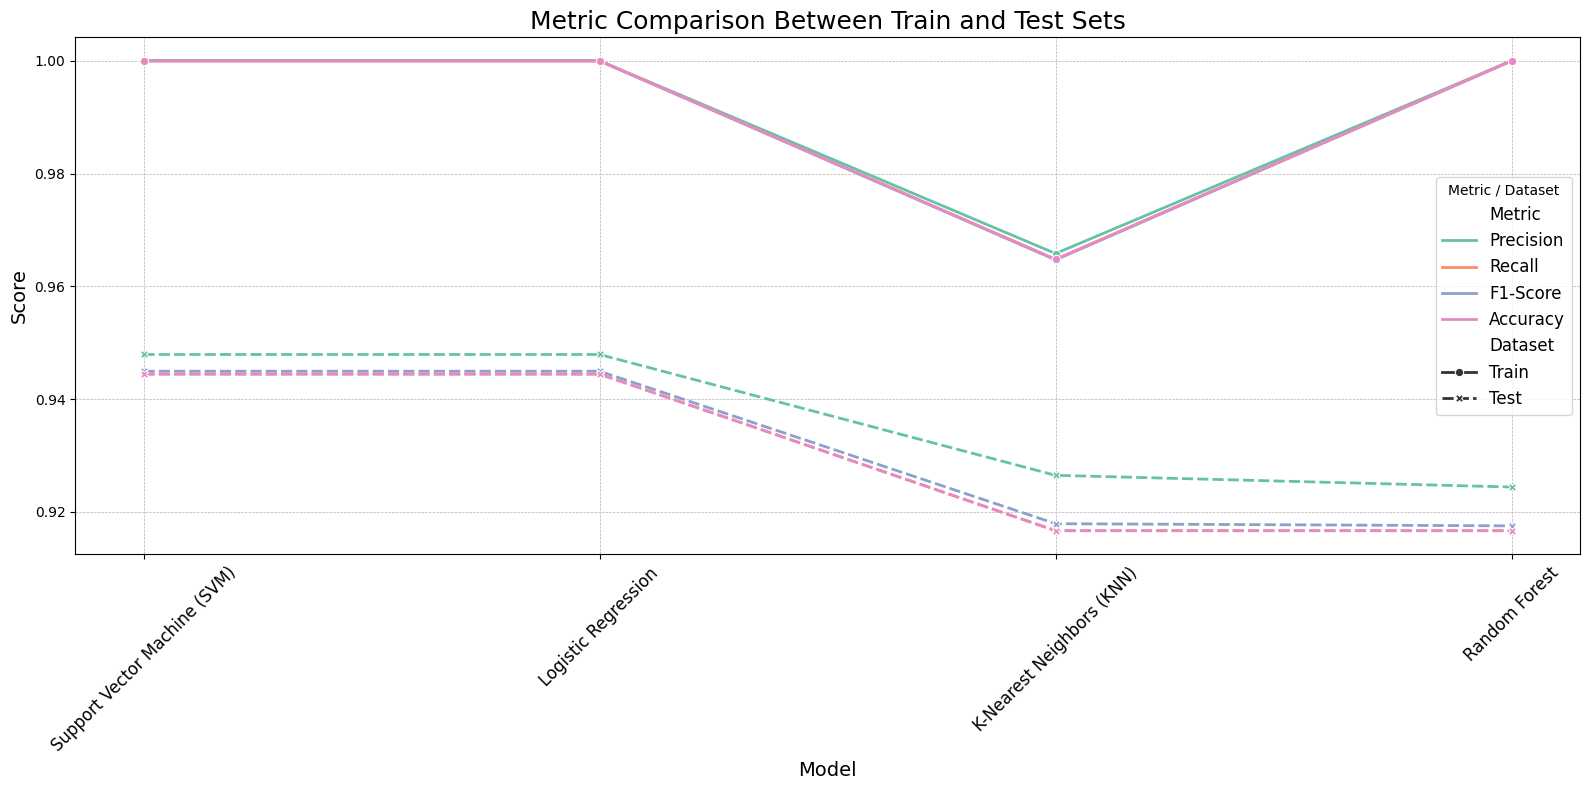

In [ ]:
# Convert results dictionary to a DataFrame
metrics_df = pd.DataFrame(results)

# Metrics to visualize
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Combine all metrics into one DataFrame for easy plotting
combined_df = pd.DataFrame({
    'Model': metrics_df['Model']
})

# Add Train and Test metrics for all metrics into the DataFrame
for metric in metrics:
    combined_df[f'Train {metric}'] = metrics_df[f'Train {metric}']
    combined_df[f'Test {metric}'] = metrics_df[f'Test {metric}']

# Melt the DataFrame to bring it into a long format suitable for seaborn
combined_melted = combined_df.melt(id_vars='Model', var_name='Metric-Dataset', value_name='Score')

# Extract Metric and Dataset (Train/Test) information from 'Metric-Dataset'
combined_melted[['Dataset', 'Metric']] = combined_melted['Metric-Dataset'].str.split(' ', expand=True)

# Plotting all metrics in one graph
plt.figure(figsize=(16, 8))

sns.lineplot(
    x='Model', y='Score', hue='Metric', style='Dataset', markers=True,
    data=combined_melted, palette='Set2', linewidth=2
)

plt.title('Metric Comparison Between Train and Test Sets', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Metric / Dataset', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## **11. Feature engineering attempts for re-evaluation**

Try undersampling to only 48 target from each class, to create a balance distribution

### Undersampling to balance target distribution

In [ ]:

# Create a new DataFrame for undersampled data
undersampled_feature_dataframe = pd.DataFrame()
undersampled_target_dataframe = pd.DataFrame()

# Loop through each class
for class_label in range(3):  # Assuming 3 classes (0, 1, 2)
    # Filter data for the current class
    class_indices = target_dataframe[target_dataframe['0'] == class_label].index

    # Randomly sample 40 instances from the current class
    sampled_indices = np.random.choice(class_indices, size=48, replace=False)

    # Append sampled data to undersampled dataframes
    undersampled_feature_dataframe = pd.concat([undersampled_feature_dataframe, feature_dataframe.loc[sampled_indices]])
    undersampled_target_dataframe = pd.concat([undersampled_target_dataframe, target_dataframe.loc[sampled_indices]])

# Reset index of the undersampled dataframes
undersampled_feature_dataframe = undersampled_feature_dataframe.reset_index(drop=True)
undersampled_target_dataframe = undersampled_target_dataframe.reset_index(drop=True)

# Now you have undersampled_feature_dataframe and undersampled_target_dataframe
# with 40 samples from each class. You can use these in your model training.
print(undersampled_feature_dataframe.shape)
undersampled_target_dataframe.shape

(144, 13)


(144, 1)

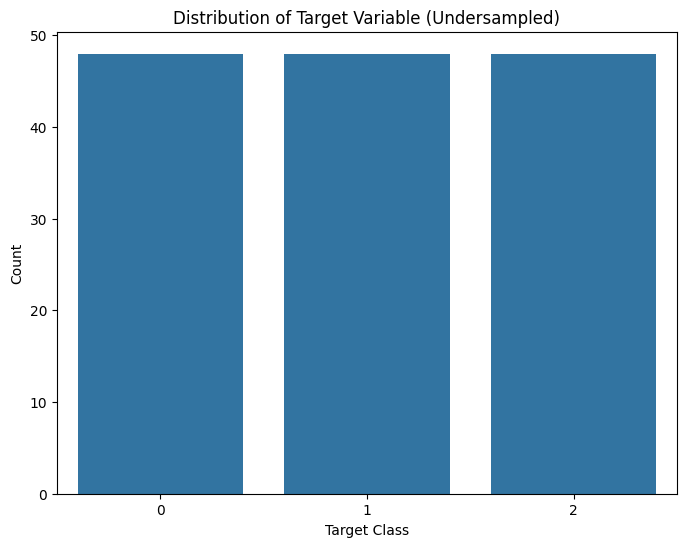

In [ ]:
# Plot out the undersampled target

plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=undersampled_target_dataframe)
plt.title('Distribution of Target Variable (Undersampled)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


Evaluating Support Vector Machine (SVM) with Undersampled Data
Training Accuracy: 1.0
Testing Accuracy: 0.9310344827586207

Model ROC-AUC Score (Testing): 1.0

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        40

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.80      1.00      0.89         8

    accuracy                           0.93        29
   macro avg       0.93      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



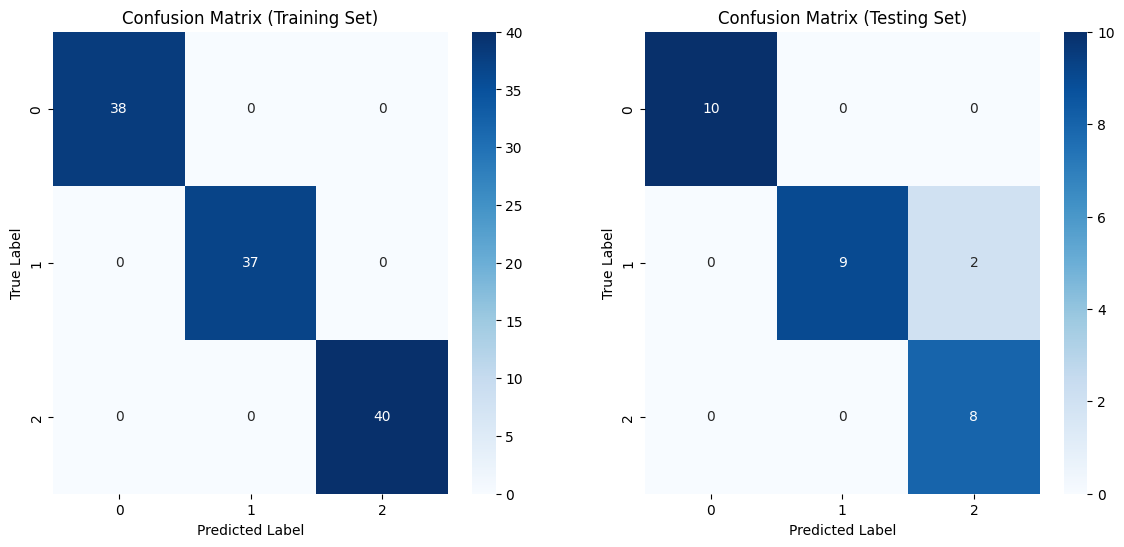


Evaluating Logistic Regression with Undersampled Data
Training Accuracy: 1.0
Testing Accuracy: 0.9310344827586207

Model ROC-AUC Score (Testing): 1.0

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        40

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115


Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94         8

    accuracy                           0.93        29
   macro avg       0.93      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



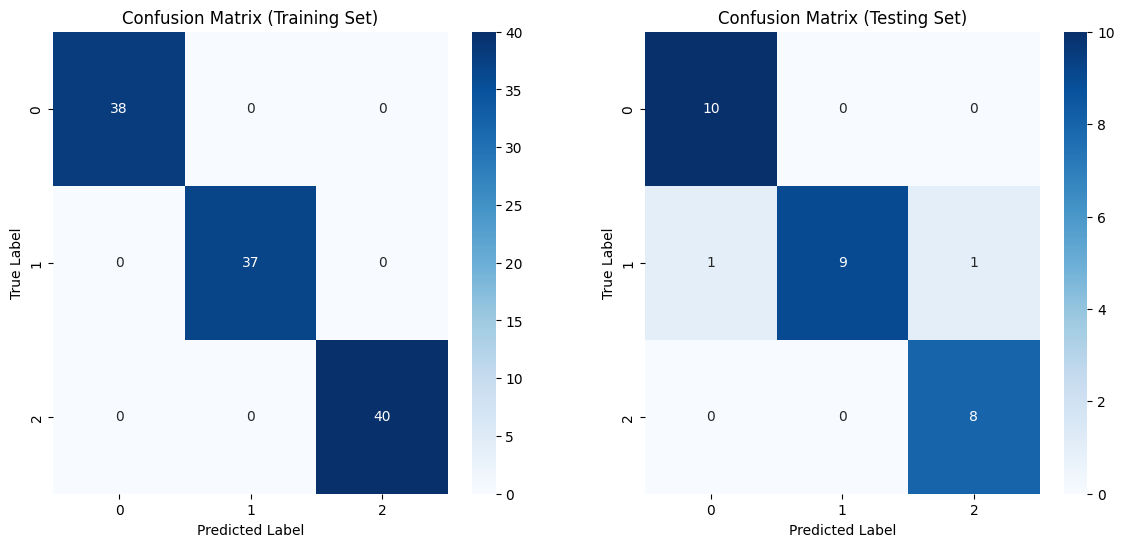


Evaluating K-Nearest Neighbors (KNN) with Undersampled Data
Training Accuracy: 0.991304347826087
Testing Accuracy: 0.896551724137931

Model ROC-AUC Score (Testing): 0.9981661856661855

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.97      0.99        37
           2       0.98      1.00      0.99        40

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115


Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.73      0.84        11
           2       0.80      1.00      0.89         8

    accuracy                           0.90        29
   macro avg       0.90      0.91      0.89        29
weighted avg       0.91      0.90    

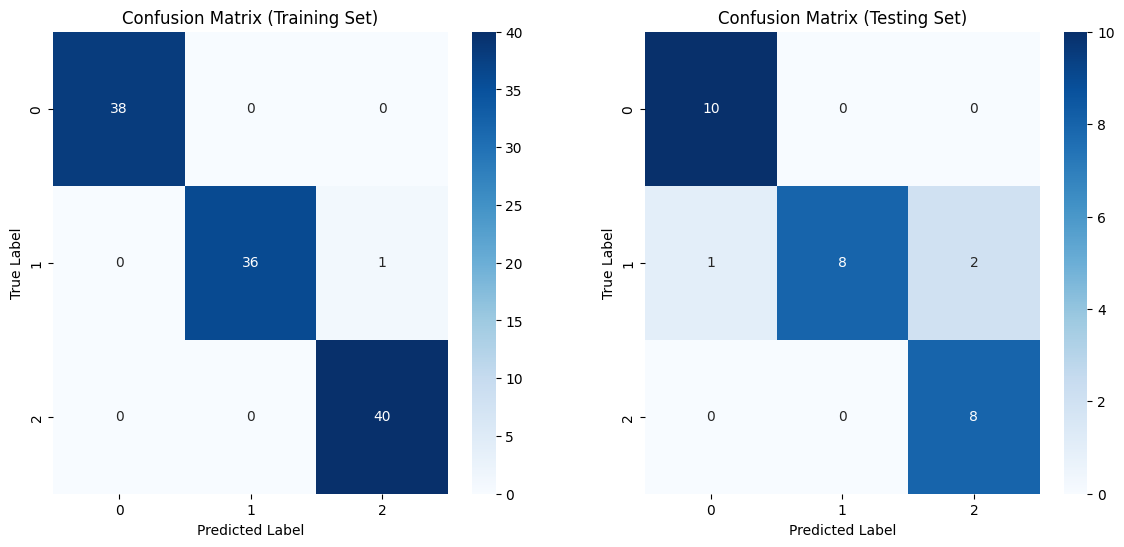


Evaluating Random Forest with Undersampled Data
Training Accuracy: 1.0
Testing Accuracy: 0.896551724137931

Model ROC-AUC Score (Testing): 1.0

Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        40

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115


Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.73      0.84        11
           2       0.73      1.00      0.84         8

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.89        29
weighted avg       0.92      0.90      0.90        29



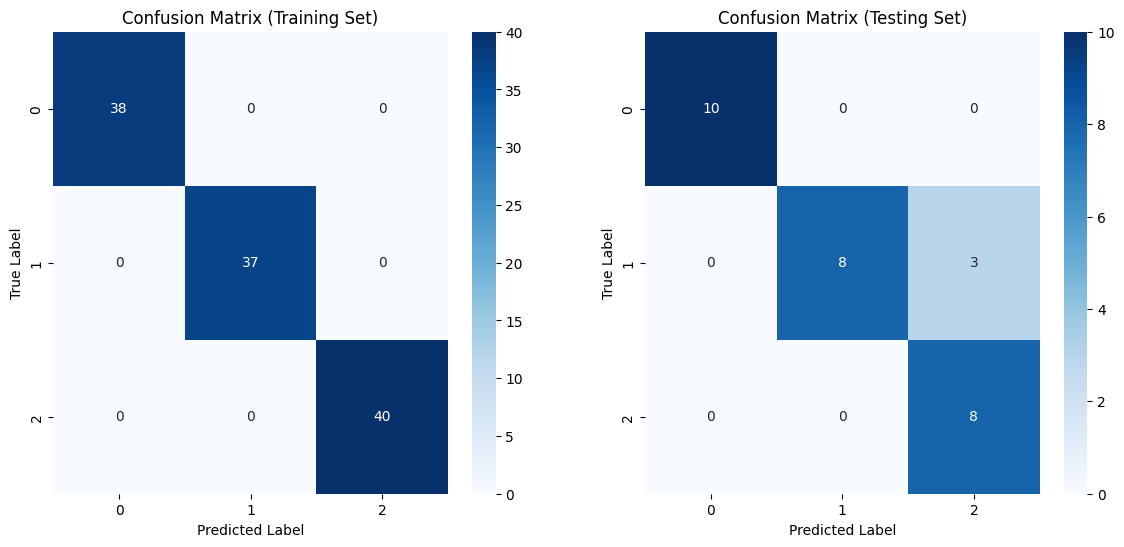

In [ ]:
# Split the undersampled data
train_index_u, test_index_u = train_test_split(undersampled_feature_dataframe, train_size=0.8, random_state=420, shuffle=True)
train_index_u = train_index_u.index
test_index_u = test_index_u.index

train_feature_u = undersampled_feature_dataframe.loc[train_index_u]
test_feature_u = undersampled_feature_dataframe.loc[test_index_u]
train_target_u = undersampled_target_dataframe.loc[train_index_u]
test_target_u = undersampled_target_dataframe.loc[test_index_u]

# Choose features using backward feature selection (same as before)
model_u = SVC(kernel='linear')
BFE_u = SequentialFeatureSelector(estimator=model_u, n_features_to_select=8, direction='backward')
BFE_u.fit(train_feature_u, train_target_u['0'])

real_train_feature_u = BFE_u.transform(train_feature_u)
real_test_feature_u = BFE_u.transform(test_feature_u)

# Retry model training with undersampled data
for model_name, model in classifiers.items():
    print(f"\n{'='*30}\nEvaluating {model_name} with Undersampled Data\n{'='*30}")
    model.fit(real_train_feature_u, train_target_u['0'])
    evaluate_model(model, real_train_feature_u, train_target_u['0'], real_test_feature_u, test_target_u['0'])

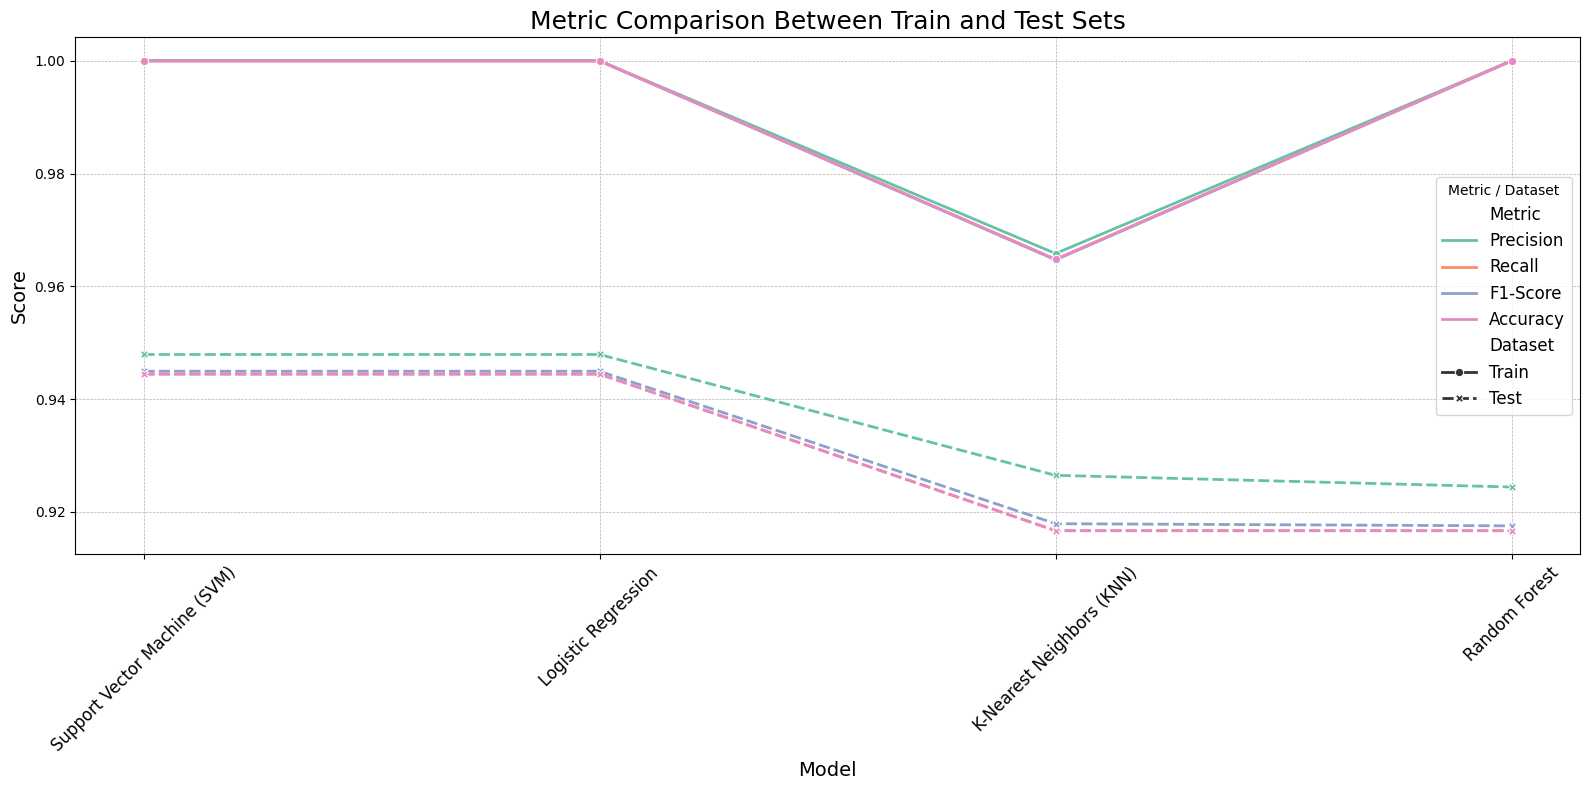

In [ ]:
# prompt: Plot Comparision Across 4 Models (Precision - Recall - F1 score - Accuracy ) in line graph like previous code

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'results_df' is your DataFrame containing model evaluation metrics

# Metrics to visualize
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Combine all metrics into one DataFrame for easy plotting
combined_df = pd.DataFrame({
    'Model': results_df['Model']
})

# Add Train and Test metrics for all metrics into the DataFrame
for metric in metrics:
    combined_df[f'Train {metric}'] = results_df[f'Train {metric}']
    combined_df[f'Test {metric}'] = results_df[f'Test {metric}']

# Melt the DataFrame to bring it into a long format suitable for seaborn
combined_melted = combined_df.melt(id_vars='Model', var_name='Metric-Dataset', value_name='Score')

# Extract Metric and Dataset (Train/Test) information from 'Metric-Dataset'
combined_melted[['Dataset', 'Metric']] = combined_melted['Metric-Dataset'].str.split(' ', expand=True)

# Plotting all metrics in one graph
plt.figure(figsize=(16, 8))

sns.lineplot(
    x='Model', y='Score', hue='Metric', style='Dataset', markers=True,
    data=combined_melted, palette='Set2', linewidth=2
)

plt.title('Metric Comparison Between Train and Test Sets', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Metric / Dataset', fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Undersampling Analysis:

To address potential class imbalance issues, undersampling was applied to create a balanced dataset with 48 samples per class.  The models were retrained and evaluated using this balanced dataset.

Overall there is only a slight change in performance when compared for test set






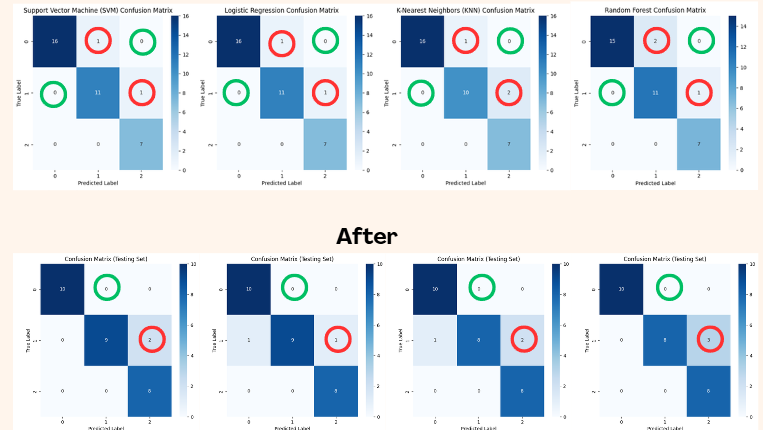

As seen in the picture, The model mistook Class 0 for 1 and Class 1 for 2 quite a bit in the original version

After balancing class, There is only mistaking Class 1 for 2 but the different is only 1-2 mistake count so we haven't conclude it for good.